In [72]:
# from src.functions import *
# season_df = pd.read_pickle('data/updated.pkl')
# df = season_df.reset_index()
# df
boxscores = pd.read_pickle('data/boxscores_df.pkl').reset_index()
boxscores

date losing_abbr         losing_name  \
0    2020-09-13 13:00:00         MIN   Minnesota Vikings   
1    2020-09-20 13:00:00         DET       Detroit Lions   
2    2020-09-27 20:20:00         NOR  New Orleans Saints   
3    2020-10-05 20:15:00         ATL     Atlanta Falcons   
4    2020-10-18 16:25:00         GNB   Green Bay Packers   
...                  ...         ...                 ...   
5873 2010-12-05 16:16:00         CAR   Carolina Panthers   
5874 2010-12-12 13:03:00         CAR   Carolina Panthers   
5875 2010-12-19 13:04:00         CRD   Arizona Cardinals   
5876 2010-12-23 20:29:00         CAR   Carolina Panthers   
5877 2011-01-02 13:03:00         CAR   Carolina Panthers   

                      stadium    time winner winning_abbr  \
0           U.S. Bank Stadium  1:00pm   Away          GNB   
1               Lambeau Field  1:00pm   Home          GNB   
2     Mercedes-Benz Superdome  8:20pm   Away          GNB   
3               Lambeau Field  8:15pm   Home          GNB   
4       Raymond James Stadium  4:25pm   Home          TAM   
...                       ...     ...    ...          ...   
5873              Qwest Field  4:16pm   Home          SEA   
5874  Bank of America Stadium  1:03pm   Away          ATL   
5875  Bank of America Stadium  1:04pm   Home          CAR   
5876              Heinz Field  8:29pm   Home          PIT   
5877             Georgia Dome  1:03pm   Home          ATL   

              winning_name day_of_week month  attendance  away_first_downs  \
0        Green Bay Packers      Sunday   Sep           0                31   
1        Green Bay Packers      Sunday   Sep           0                19   
2        Green Bay Packers      Sunday   Sep         748                24   
3        Green Bay Packers      Monday   Oct           0                24   
4     Tampa Bay Buccaneers      Sunday   Oct       15540                13   
...                    ...         ...   ...         ...               ...   
5873      Seattle Seahawks      Sunday   Dec       66577                18   
5874       Atlanta Falcons      Sunday   Dec       71235                24   
5875     Carolina Panthers      Sunday   Dec       71849                11   
5876   Pittsburgh Steelers    Thursday   Dec       61748                 7   
5877       Atlanta Falcons      Sunday   Jan       67349                12   

      away_fourth_down_attempts  away_fourth_down_conversions  away_fumbles  \
0                             2                             1             1   
1                             1                             0             0   
2                             2                             1             0   
3                             4                             2             0   
4                             0                             0             1   
...                         ...                           ...           ...   
5873                          2                             1             1   
5874                          0                             0             0   
5875                          1                             1             2   
5876                          1                             0             1   
5877                          1                             0             4   

      away_fumbles_lost  away_interceptions  away_net_pass_yards  \
0                     0                   0                  364   
1                     0                   1                  218   
2                     0                   0                  271   
3                     0                   0                  249   
4                     0                   2                  107   
...                 ...                 ...                  ...   
5873                  0                   1                  152   
5874                  0                   1                  200   
5875                  1                   1                  175   


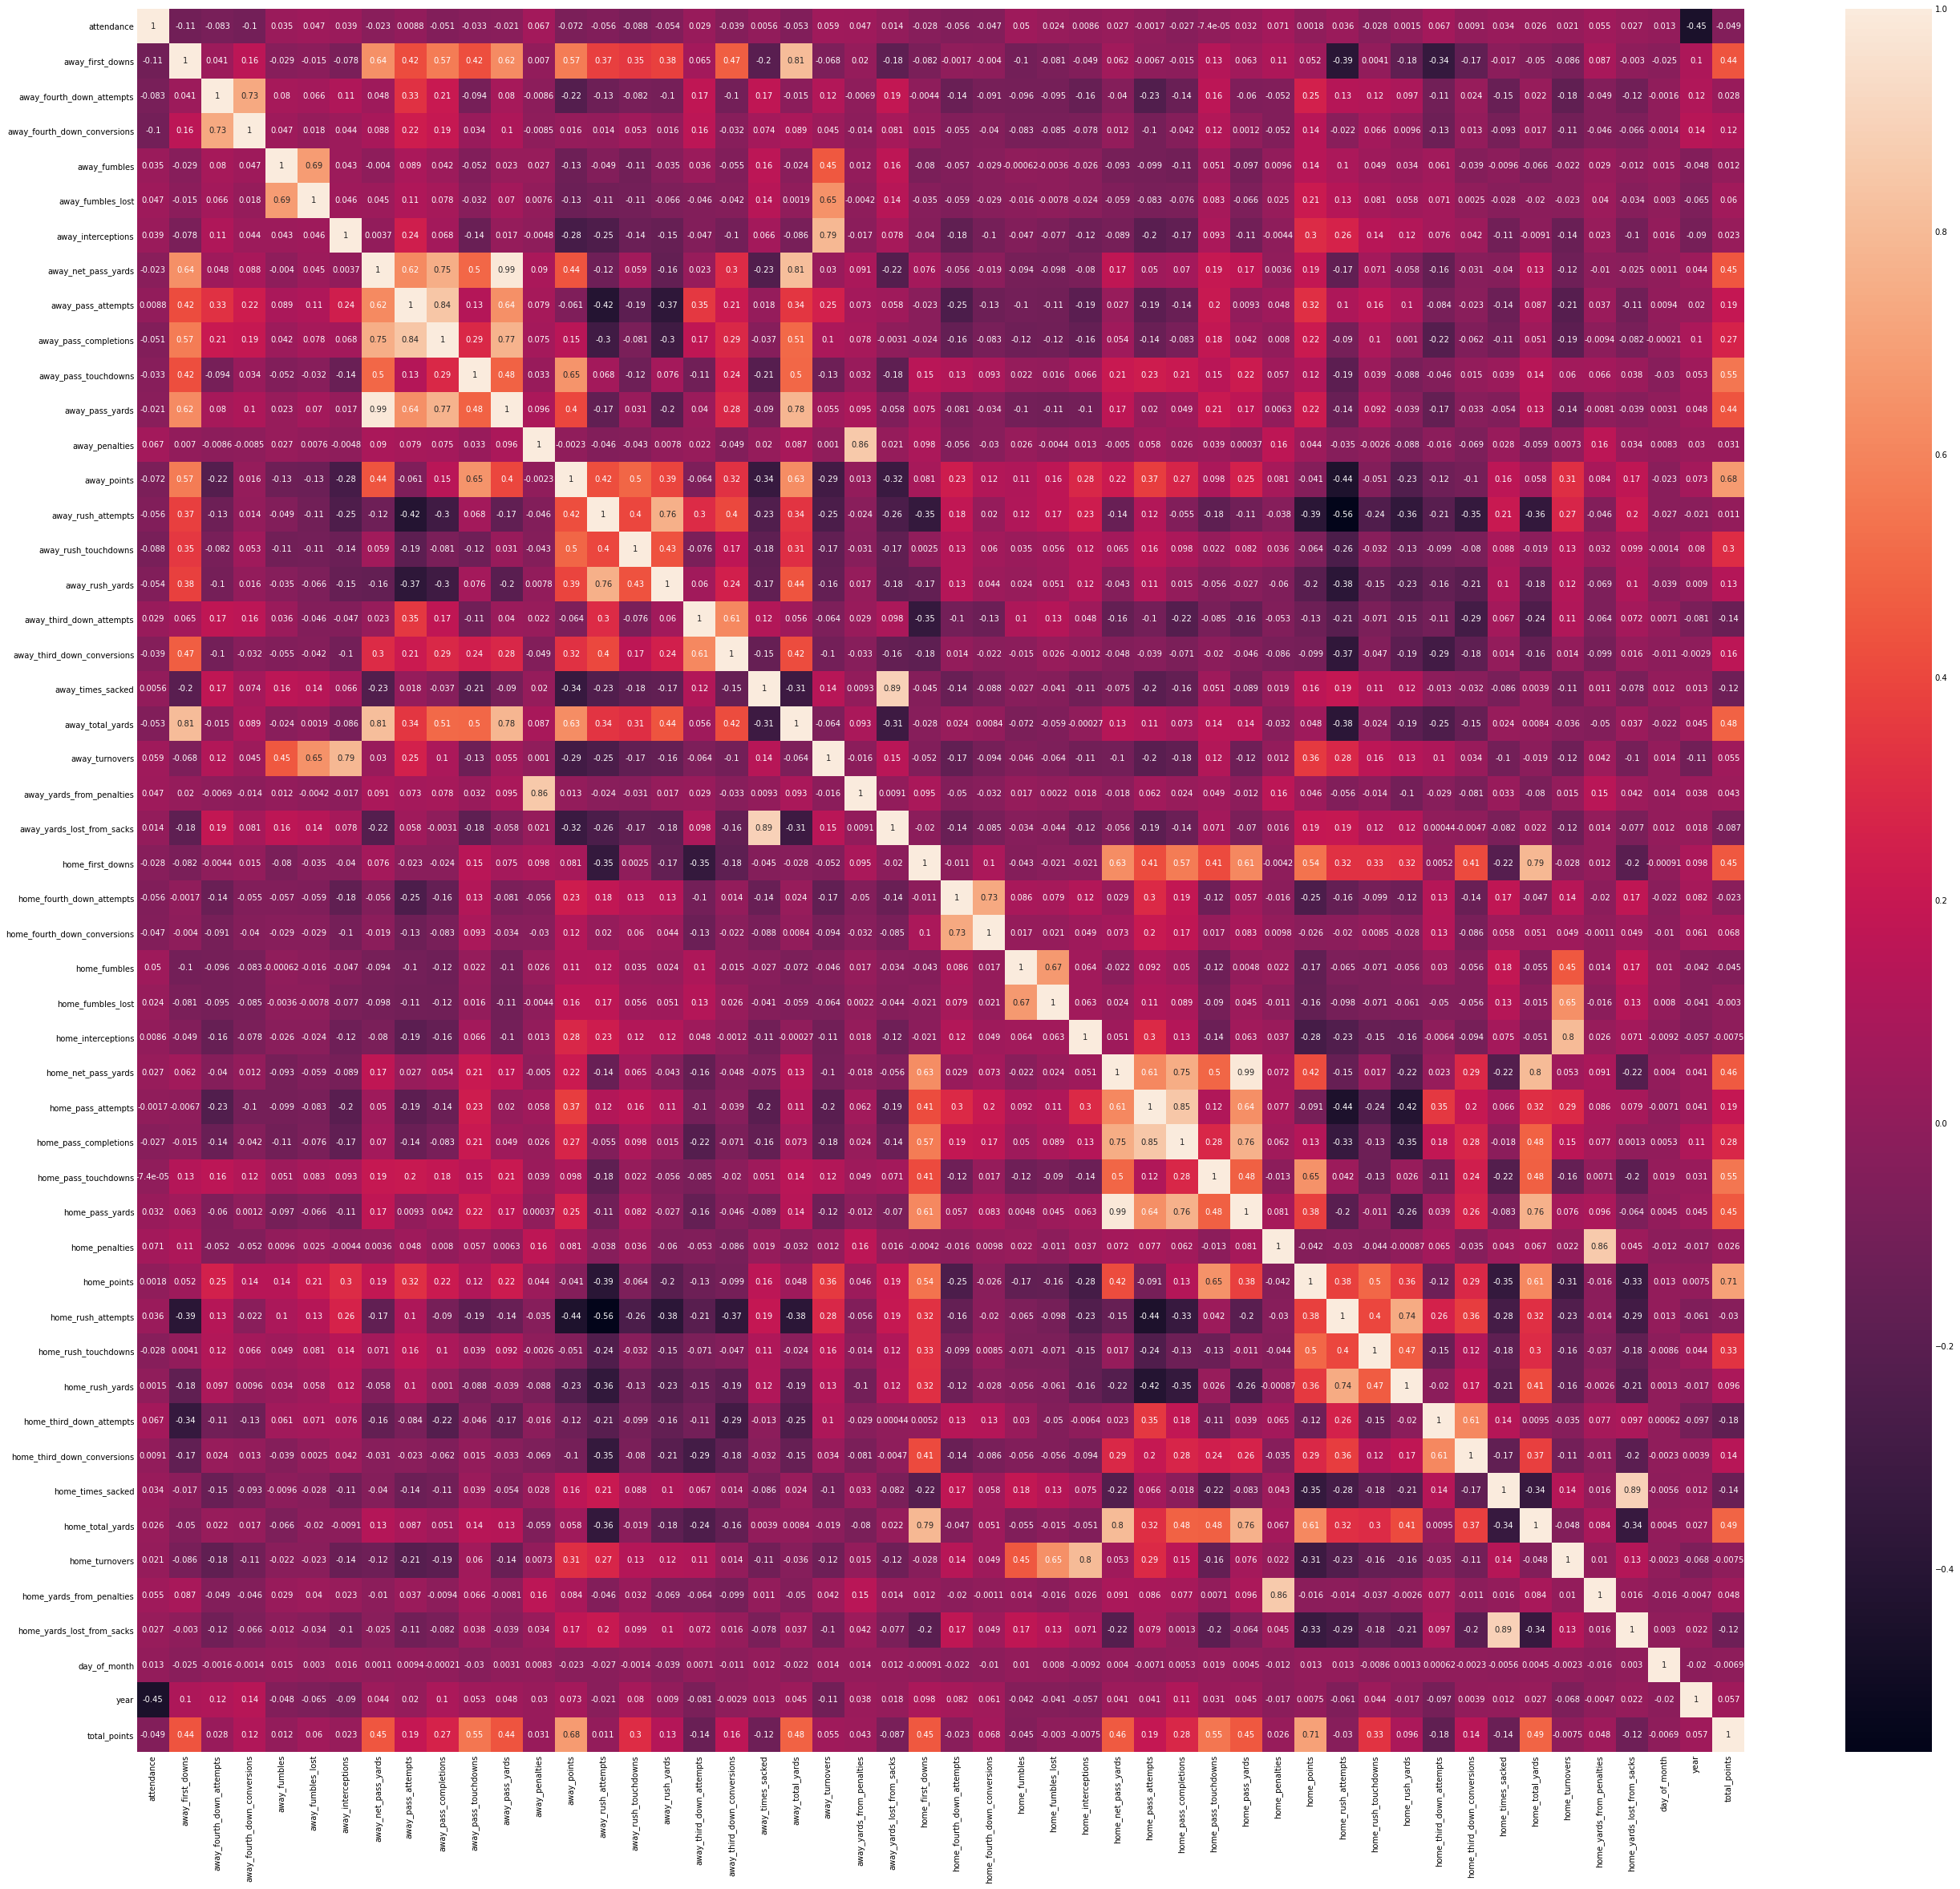

In [73]:
import seaborn as sn

fig, ax = plt.subplots(figsize=(40, 40))

corr = boxscores.corr()
sn.heatmap(corr, annot=True)
plt.show()

In [74]:
df_pure_stats = boxscores.select_dtypes('number')
df_pure_stats

attendance  away_first_downs  away_fourth_down_attempts  \
0              0                31                          2   
1              0                19                          1   
2            748                24                          2   
3              0                24                          4   
4          15540                13                          0   
...          ...               ...                        ...   
5873       66577                18                          2   
5874       71235                24                          0   
5875       71849                11                          1   
5876       61748                 7                          1   
5877       67349                12                          1   

      away_fourth_down_conversions  away_fumbles  away_fumbles_lost  \
0                                1             1                  0   
1                                0             0                  0   
2                                1             0                  0   
3                                2             0                  0   
4                                0             1                  0   
...                            ...           ...                ...   
5873                             1             1                  0   
5874                             0             0                  0   
5875                             1             2                  1   
5876                             0             1                  1   
5877                             0             4                  1   

      away_interceptions  away_net_pass_yards  away_pass_attempts  \
0                      0                  364                  44   
1                      1                  218                  33   
2                      0                  271                  32   
3                      0                  249                  39   
4                      2                  107                  35   
...                  ...                  ...                 ...   
5873                   1                  152                  34   
5874                   1                  200                  34   
5875                   1                  175                  33   
5876                   1                   45                  23   
5877                   1                  154                  34   

      away_pass_completions  away_pass_touchdowns  away_pass_yards  \
0                        32                     4              364   
1                        20                     2              244   
2                        21                     3              283   
3                        28                     0              285   
4                        16                     0              160   
...                     ...                   ...              ...   
5873                     18                     0              169   
5874                     20                     1              227   
5875                     17                     0              196   
5876                     10                     0               72   
5877                     19                     1              182   

      away_penalties  away_points  away_rush_attempts  away_rush_touchdowns  \
0                  6           43                  32                     1   
1                  7           21                  21                     1   
2                  2           37                  26                     1   
3                  3           16                  25                     2   
4                  6           10                  21                     1   
...              ...          ...                 ...                   ...   
5873               8           14                  30                     2   
5874               1           31                  36                 

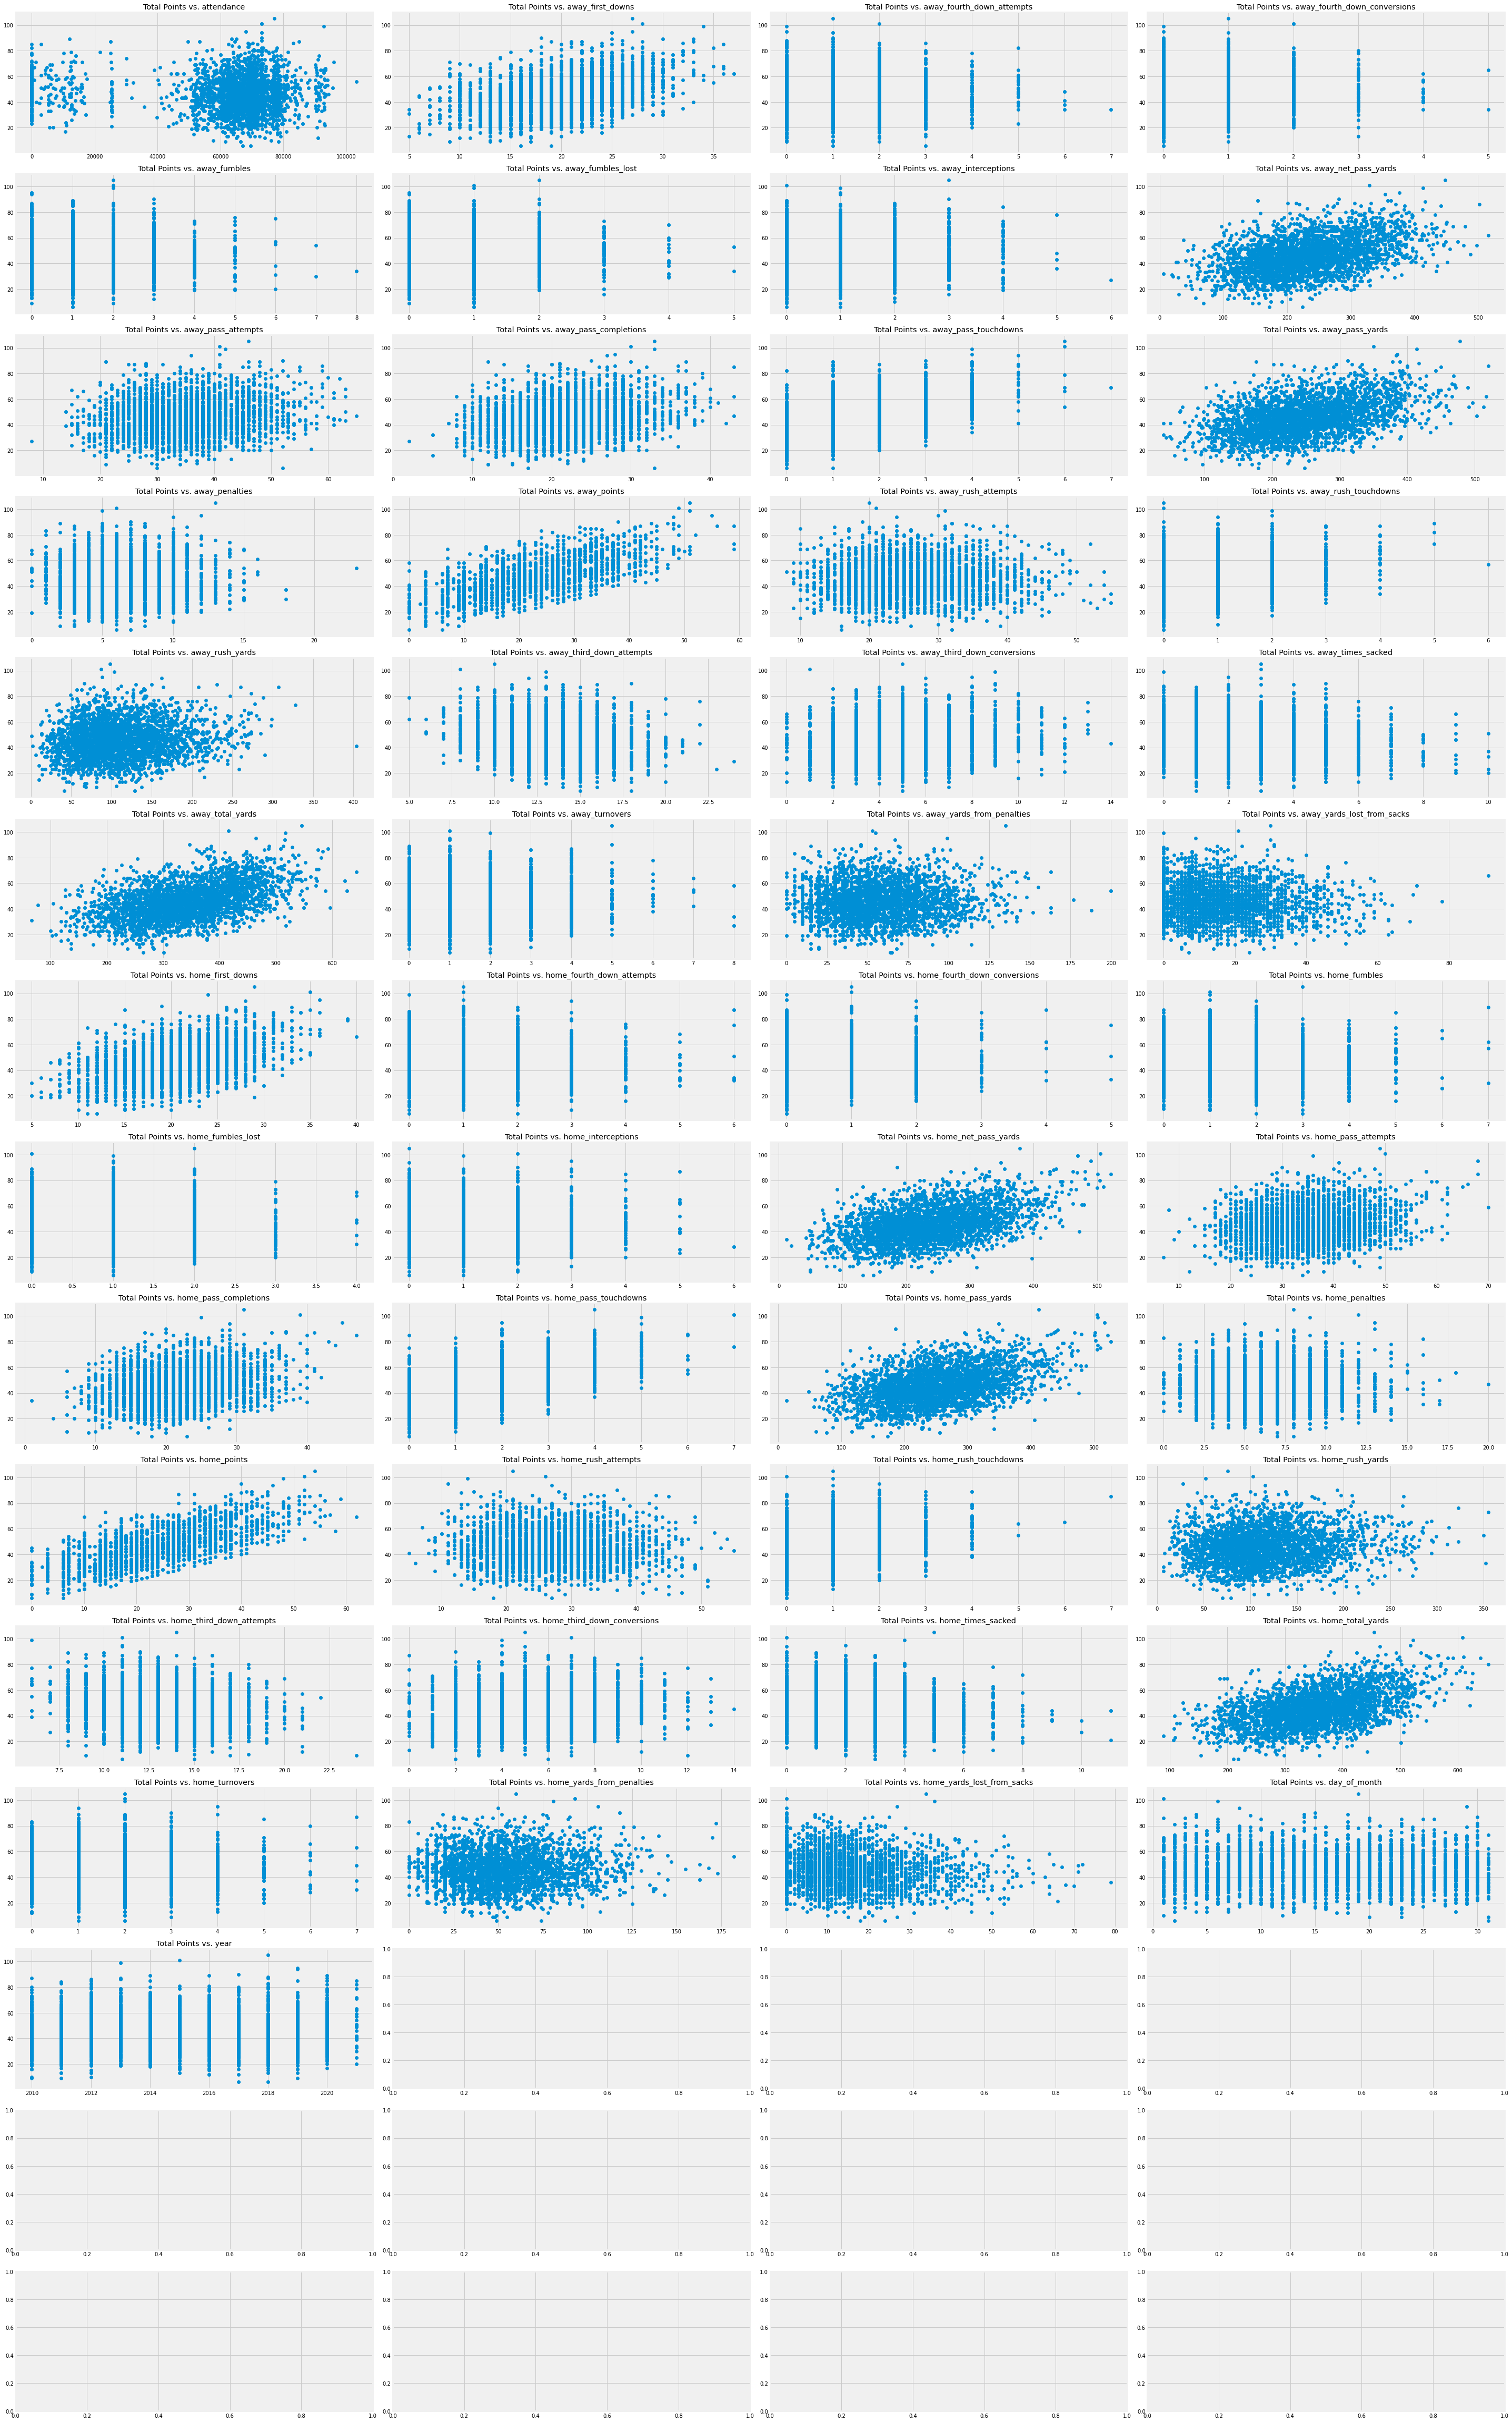

In [75]:
fig, axs = plt.subplots(15, 4, figsize = (40, 64))

for ax, col in zip(axs.flatten(), df_pure_stats.drop(['total_points'], axis=1).columns):
    ax.scatter(df_pure_stats[col], df_pure_stats['total_points'])
    ax.set_title(f'Total Points vs. {col}')
    
fig.tight_layout()

In [78]:
boxscores[boxscores['total_points'] < 10]

date losing_abbr          losing_name  \
560  2019-10-20 13:00:00         WAS  Washington Redskins   
1062 2019-10-20 13:00:00         WAS  Washington Redskins   
1157 2018-12-02 13:00:00         CLT   Indianapolis Colts   
1585 2018-12-02 13:00:00         CLT   Indianapolis Colts   
1657 2017-12-31 13:00:00         PHI  Philadelphia Eagles   
1846 2017-12-31 13:00:00         PHI  Philadelphia Eagles   
5187 2011-10-23 13:05:00         SEA     Seattle Seahawks   
5301 2011-10-23 13:05:00         SEA     Seattle Seahawks   
5499 2010-10-31 13:03:00         NYJ        New York Jets   
5554 2010-10-31 13:03:00         NYJ        New York Jets   

                       stadium    time winner winning_abbr  \
560                 FedExField  1:00pm   Away          SFO   
1062                FedExField  1:00pm   Away          SFO   
1157         TIAA Bank Stadium  1:00pm   Home          JAX   
1585         TIAA Bank Stadium  1:00pm   Home          JAX   
1657   Lincoln Financial Field  1:00pm   Away          DAL   
1846   Lincoln Financial Field  1:00pm   Away          DAL   
5187  Cleveland Browns Stadium  1:05pm   Home          CLE   
5301  Cleveland Browns Stadium  1:05pm   Home          CLE   
5499   New Meadowlands Stadium  1:03pm   Away          GNB   
5554   New Meadowlands Stadium  1:03pm   Away          GNB   

              winning_name day_of_week month  attendance  away_first_downs  \
560    San Francisco 49ers      Sunday   Oct       61459                17   
1062   San Francisco 49ers      Sunday   Oct       61459                17   
1157  Jacksonville Jaguars      Sunday   Dec       67030                19   
1585  Jacksonville Jaguars      Sunday   Dec       67030                19   
1657        Dallas Cowboys      Sunday   Dec       69596                16   
1846        Dallas Cowboys      Sunday   Dec       69596                16   
5187      Cleveland Browns      Sunday   Oct       66350                 9   
5301      Cleveland Browns      Sunday   Oct       66350                 9   
5499     Green Bay Packers      Sunday   Oct       78484                13   
5554     Green Bay Packers      Sunday   Oct       78484                13   

      away_fourth_down_attempts  away_fourth_down_conversions  away_fumbles  \
560                           2                             1             1   
1062                          2                             1             1   
1157                          3                             0             1   
1585                          3                             0             1   
1657                          1                             0             1   
1846                          1                             0             1   
5187                          1                             0             2   
5301                          1                             0             2   
5499                          0                             0             0   
5554                          0                             0             0   

      away_fumbles_lost  away_interceptions  away_net_pass_yards  \
560                   0                   1                  146   
1062                  0                   1                  146   
1157                  1                   1                  224   
1585                  1                   1                  224   
1657                  1                   0                  172   
1846                  1                   0                  172   
5187                  1                   1                   69   
5301                  1                   1                   69   
5499                  0                   0                  156   
5554                  0                   0                  156   

      away_pass_attempts  away_pass_completions  away_pass_touchdowns  \
560                   21                     12                     0   
1062                  21                 

# Time to create some functions that can be used slice portions of the data to be analyzed on a particular basis

## First going to look at `age` for which players appear to be at an age between 22 - 43

* When investigating the ages that appear as `nan` values it appears that these occur with players that were traded within a particular year
    * This also appears to happen to **only the first instance** of a player playing on multiple teams in a particular season. If the player has been traded in the middle of a season multiple times the rows after the first occurence will simply use stats from both teams combined into the one row (See examples from *Tyler Ervin* & *Damon Harrison* below)
    * Another quick note is that the Age for these particular years show as `nan` with a `float` datatype & the year shows as an empty string

In [7]:
for idx, age in enumerate(df['age']):
    print(idx, '       ', age, '       ', type(age))

0         22.0         <class 'float'>
1         23.0         <class 'float'>
2         24.0         <class 'float'>
3         25.0         <class 'float'>
4         26.0         <class 'float'>
5         27.0         <class 'float'>
6         28.0         <class 'float'>
7         22.0         <class 'float'>
8         23.0         <class 'float'>
9         24.0         <class 'float'>
10         25.0         <class 'float'>
11         21.0         <class 'float'>
12         22.0         <class 'float'>
13         23.0         <class 'float'>
14         22.0         <class 'float'>
15         23.0         <class 'float'>
16         24.0         <class 'float'>
17         25.0         <class 'float'>
18         26.0         <class 'float'>
19         27.0         <class 'float'>
20         23.0         <class 'float'>
21         24.0         <class 'float'>
22         25.0         <class 'float'>
23         26.0         <class 'float'>
24         27.0         <class 'float'>
25        

432         30.0         <class 'float'>
433         26.0         <class 'float'>
434         24.0         <class 'float'>
435         25.0         <class 'float'>
436         25.0         <class 'float'>
437         26.0         <class 'float'>
438         27.0         <class 'float'>
439         28.0         <class 'float'>
440         29.0         <class 'float'>
441         30.0         <class 'float'>
442         31.0         <class 'float'>
443         32.0         <class 'float'>
444         33.0         <class 'float'>
445         22.0         <class 'float'>
446         23.0         <class 'float'>
447         22.0         <class 'float'>
448         23.0         <class 'float'>
449         24.0         <class 'float'>
450         23.0         <class 'float'>
451         24.0         <class 'float'>
452         22.0         <class 'float'>
453         nan         <class 'float'>
454         25.0         <class 'float'>
455         26.0         <class 'float'>
456         27.0 

762         23.0         <class 'float'>
763         24.0         <class 'float'>
764         25.0         <class 'float'>
765         26.0         <class 'float'>
766         27.0         <class 'float'>
767         23.0         <class 'float'>
768         24.0         <class 'float'>
769         25.0         <class 'float'>
770         26.0         <class 'float'>
771         27.0         <class 'float'>
772         28.0         <class 'float'>
773         31.0         <class 'float'>
774         29.0         <class 'float'>
775         30.0         <class 'float'>
776         32.0         <class 'float'>
777         33.0         <class 'float'>
778         34.0         <class 'float'>
779         23.0         <class 'float'>
780         24.0         <class 'float'>
781         25.0         <class 'float'>
782         26.0         <class 'float'>
783         27.0         <class 'float'>
784         28.0         <class 'float'>
785         29.0         <class 'float'>
786         30.0

1139         23.0         <class 'float'>
1140         24.0         <class 'float'>
1141         25.0         <class 'float'>
1142         26.0         <class 'float'>
1143         27.0         <class 'float'>
1144         24.0         <class 'float'>
1145         25.0         <class 'float'>
1146         26.0         <class 'float'>
1147         27.0         <class 'float'>
1148         28.0         <class 'float'>
1149         30.0         <class 'float'>
1150         31.0         <class 'float'>
1151         32.0         <class 'float'>
1152         23.0         <class 'float'>
1153         22.0         <class 'float'>
1154         23.0         <class 'float'>
1155         24.0         <class 'float'>
1156         25.0         <class 'float'>
1157         26.0         <class 'float'>
1158         27.0         <class 'float'>
1159         28.0         <class 'float'>
1160         29.0         <class 'float'>
1161         23.0         <class 'float'>
1162         25.0         <class '

1534         23.0         <class 'float'>
1535         24.0         <class 'float'>
1536         26.0         <class 'float'>
1537         27.0         <class 'float'>
1538         28.0         <class 'float'>
1539         22.0         <class 'float'>
1540         23.0         <class 'float'>
1541         24.0         <class 'float'>
1542         25.0         <class 'float'>
1543         26.0         <class 'float'>
1544         27.0         <class 'float'>
1545         21.0         <class 'float'>
1546         22.0         <class 'float'>
1547         24.0         <class 'float'>
1548         23.0         <class 'float'>
1549         24.0         <class 'float'>
1550         nan         <class 'float'>
1551         25.0         <class 'float'>
1552         23.0         <class 'float'>
1553         24.0         <class 'float'>
1554         25.0         <class 'float'>
1555         26.0         <class 'float'>
1556         27.0         <class 'float'>
1557         28.0         <class 'f

1927         30.0         <class 'float'>
1928         31.0         <class 'float'>
1929         33.0         <class 'float'>
1930         23.0         <class 'float'>
1931         23.0         <class 'float'>
1932         24.0         <class 'float'>
1933         25.0         <class 'float'>
1934         26.0         <class 'float'>
1935         27.0         <class 'float'>
1936         28.0         <class 'float'>
1937         29.0         <class 'float'>
1938         30.0         <class 'float'>
1939         31.0         <class 'float'>
1940         32.0         <class 'float'>
1941         24.0         <class 'float'>
1942         25.0         <class 'float'>
1943         23.0         <class 'float'>
1944         24.0         <class 'float'>
1945         25.0         <class 'float'>
1946         26.0         <class 'float'>
1947         27.0         <class 'float'>
1948         21.0         <class 'float'>
1949         22.0         <class 'float'>
1950         23.0         <class '

2198         27.0         <class 'float'>
2199         21.0         <class 'float'>
2200         22.0         <class 'float'>
2201         24.0         <class 'float'>
2202         25.0         <class 'float'>
2203         26.0         <class 'float'>
2204         27.0         <class 'float'>
2205         28.0         <class 'float'>
2206         nan         <class 'float'>
2207         29.0         <class 'float'>
2208         30.0         <class 'float'>
2209         25.0         <class 'float'>
2210         26.0         <class 'float'>
2211         27.0         <class 'float'>
2212         28.0         <class 'float'>
2213         29.0         <class 'float'>
2214         30.0         <class 'float'>
2215         31.0         <class 'float'>
2216         nan         <class 'float'>
2217         32.0         <class 'float'>
2218         33.0         <class 'float'>
2219         23.0         <class 'float'>
2220         24.0         <class 'float'>
2221         25.0         <class 'fl

2613         24.0         <class 'float'>
2614         28.0         <class 'float'>
2615         22.0         <class 'float'>
2616         23.0         <class 'float'>
2617         24.0         <class 'float'>
2618         25.0         <class 'float'>
2619         26.0         <class 'float'>
2620         27.0         <class 'float'>
2621         29.0         <class 'float'>
2622         30.0         <class 'float'>
2623         23.0         <class 'float'>
2624         23.0         <class 'float'>
2625         24.0         <class 'float'>
2626         23.0         <class 'float'>
2627         24.0         <class 'float'>
2628         25.0         <class 'float'>
2629         22.0         <class 'float'>
2630         23.0         <class 'float'>
2631         24.0         <class 'float'>
2632         26.0         <class 'float'>
2633         27.0         <class 'float'>
2634         24.0         <class 'float'>
2635         24.0         <class 'float'>
2636         25.0         <class '

2860         21.0         <class 'float'>
2861         23.0         <class 'float'>
2862         24.0         <class 'float'>
2863         25.0         <class 'float'>
2864         22.0         <class 'float'>
2865         23.0         <class 'float'>
2866         24.0         <class 'float'>
2867         25.0         <class 'float'>
2868         26.0         <class 'float'>
2869         27.0         <class 'float'>
2870         28.0         <class 'float'>
2871         25.0         <class 'float'>
2872         23.0         <class 'float'>
2873         24.0         <class 'float'>
2874         26.0         <class 'float'>
2875         27.0         <class 'float'>
2876         28.0         <class 'float'>
2877         23.0         <class 'float'>
2878         23.0         <class 'float'>
2879         24.0         <class 'float'>
2880         25.0         <class 'float'>
2881         26.0         <class 'float'>
2882         27.0         <class 'float'>
2883         28.0         <class '

3230         23.0         <class 'float'>
3231         24.0         <class 'float'>
3232         25.0         <class 'float'>
3233         26.0         <class 'float'>
3234         27.0         <class 'float'>
3235         25.0         <class 'float'>
3236         21.0         <class 'float'>
3237         22.0         <class 'float'>
3238         23.0         <class 'float'>
3239         24.0         <class 'float'>
3240         26.0         <class 'float'>
3241         27.0         <class 'float'>
3242         21.0         <class 'float'>
3243         22.0         <class 'float'>
3244         23.0         <class 'float'>
3245         23.0         <class 'float'>
3246         24.0         <class 'float'>
3247         25.0         <class 'float'>
3248         26.0         <class 'float'>
3249         23.0         <class 'float'>
3250         24.0         <class 'float'>
3251         25.0         <class 'float'>
3252         26.0         <class 'float'>
3253         28.0         <class '

3539         22.0         <class 'float'>
3540         23.0         <class 'float'>
3541         nan         <class 'float'>
3542         24.0         <class 'float'>
3543         25.0         <class 'float'>
3544         23.0         <class 'float'>
3545         24.0         <class 'float'>
3546         25.0         <class 'float'>
3547         26.0         <class 'float'>
3548         27.0         <class 'float'>
3549         28.0         <class 'float'>
3550         26.0         <class 'float'>
3551         27.0         <class 'float'>
3552         21.0         <class 'float'>
3553         22.0         <class 'float'>
3554         23.0         <class 'float'>
3555         24.0         <class 'float'>
3556         25.0         <class 'float'>
3557         28.0         <class 'float'>
3558         23.0         <class 'float'>
3559         24.0         <class 'float'>
3560         25.0         <class 'float'>
3561         26.0         <class 'float'>
3562         23.0         <class 'f

3838         26.0         <class 'float'>
3839         27.0         <class 'float'>
3840         28.0         <class 'float'>
3841         23.0         <class 'float'>
3842         24.0         <class 'float'>
3843         25.0         <class 'float'>
3844         26.0         <class 'float'>
3845         27.0         <class 'float'>
3846         24.0         <class 'float'>
3847         25.0         <class 'float'>
3848         26.0         <class 'float'>
3849         nan         <class 'float'>
3850         27.0         <class 'float'>
3851         28.0         <class 'float'>
3852         29.0         <class 'float'>
3853         30.0         <class 'float'>
3854         31.0         <class 'float'>
3855         32.0         <class 'float'>
3856         23.0         <class 'float'>
3857         24.0         <class 'float'>
3858         25.0         <class 'float'>
3859         26.0         <class 'float'>
3860         27.0         <class 'float'>
3861         28.0         <class 'f

4172         24.0         <class 'float'>
4173         25.0         <class 'float'>
4174         26.0         <class 'float'>
4175         27.0         <class 'float'>
4176         28.0         <class 'float'>
4177         29.0         <class 'float'>
4178         22.0         <class 'float'>
4179         23.0         <class 'float'>
4180         24.0         <class 'float'>
4181         25.0         <class 'float'>
4182         26.0         <class 'float'>
4183         27.0         <class 'float'>
4184         28.0         <class 'float'>
4185         29.0         <class 'float'>
4186         30.0         <class 'float'>
4187         31.0         <class 'float'>
4188         23.0         <class 'float'>
4189         24.0         <class 'float'>
4190         25.0         <class 'float'>
4191         26.0         <class 'float'>
4192         22.0         <class 'float'>
4193         23.0         <class 'float'>
4194         24.0         <class 'float'>
4195         25.0         <class '

4484         23.0         <class 'float'>
4485         24.0         <class 'float'>
4486         25.0         <class 'float'>
4487         26.0         <class 'float'>
4488         27.0         <class 'float'>
4489         28.0         <class 'float'>
4490         29.0         <class 'float'>
4491         30.0         <class 'float'>
4492         31.0         <class 'float'>
4493         32.0         <class 'float'>
4494         33.0         <class 'float'>
4495         34.0         <class 'float'>
4496         23.0         <class 'float'>
4497         21.0         <class 'float'>
4498         22.0         <class 'float'>
4499         23.0         <class 'float'>
4500         24.0         <class 'float'>
4501         nan         <class 'float'>
4502         25.0         <class 'float'>
4503         26.0         <class 'float'>
4504         23.0         <class 'float'>
4505         25.0         <class 'float'>
4506         26.0         <class 'float'>
4507         27.0         <class 'f

4879         25.0         <class 'float'>
4880         26.0         <class 'float'>
4881         27.0         <class 'float'>
4882         28.0         <class 'float'>
4883         29.0         <class 'float'>
4884         nan         <class 'float'>
4885         30.0         <class 'float'>
4886         23.0         <class 'float'>
4887         24.0         <class 'float'>
4888         25.0         <class 'float'>
4889         24.0         <class 'float'>
4890         25.0         <class 'float'>
4891         26.0         <class 'float'>
4892         27.0         <class 'float'>
4893         25.0         <class 'float'>
4894         26.0         <class 'float'>
4895         27.0         <class 'float'>
4896         28.0         <class 'float'>
4897         29.0         <class 'float'>
4898         30.0         <class 'float'>
4899         23.0         <class 'float'>
4900         24.0         <class 'float'>
4901         25.0         <class 'float'>
4902         26.0         <class 'f

5238         27.0         <class 'float'>
5239         28.0         <class 'float'>
5240         29.0         <class 'float'>
5241         31.0         <class 'float'>
5242         32.0         <class 'float'>
5243         35.0         <class 'float'>
5244         24.0         <class 'float'>
5245         25.0         <class 'float'>
5246         22.0         <class 'float'>
5247         23.0         <class 'float'>
5248         24.0         <class 'float'>
5249         25.0         <class 'float'>
5250         26.0         <class 'float'>
5251         27.0         <class 'float'>
5252         28.0         <class 'float'>
5253         29.0         <class 'float'>
5254         30.0         <class 'float'>
5255         31.0         <class 'float'>
5256         nan         <class 'float'>
5257         32.0         <class 'float'>
5258         23.0         <class 'float'>
5259         24.0         <class 'float'>
5260         22.0         <class 'float'>
5261         24.0         <class 'f

5733         33.0         <class 'float'>
5734         34.0         <class 'float'>
5735         25.0         <class 'float'>
5736         26.0         <class 'float'>
5737         27.0         <class 'float'>
5738         28.0         <class 'float'>
5739         29.0         <class 'float'>
5740         30.0         <class 'float'>
5741         23.0         <class 'float'>
5742         25.0         <class 'float'>
5743         26.0         <class 'float'>
5744         24.0         <class 'float'>
5745         23.0         <class 'float'>
5746         25.0         <class 'float'>
5747         nan         <class 'float'>
5748         23.0         <class 'float'>
5749         24.0         <class 'float'>
5750         25.0         <class 'float'>
5751         26.0         <class 'float'>
5752         27.0         <class 'float'>
5753         28.0         <class 'float'>
5754         30.0         <class 'float'>
5755         23.0         <class 'float'>
5756         24.0         <class 'f

6135         33.0         <class 'float'>
6136         34.0         <class 'float'>
6137         23.0         <class 'float'>
6138         24.0         <class 'float'>
6139         25.0         <class 'float'>
6140         26.0         <class 'float'>
6141         27.0         <class 'float'>
6142         28.0         <class 'float'>
6143         29.0         <class 'float'>
6144         25.0         <class 'float'>
6145         26.0         <class 'float'>
6146         27.0         <class 'float'>
6147         28.0         <class 'float'>
6148         29.0         <class 'float'>
6149         31.0         <class 'float'>
6150         32.0         <class 'float'>
6151         33.0         <class 'float'>
6152         30.0         <class 'float'>
6153         24.0         <class 'float'>
6154         29.0         <class 'float'>
6155         23.0         <class 'float'>
6156         24.0         <class 'float'>
6157         25.0         <class 'float'>
6158         26.0         <class '

6518         27.0         <class 'float'>
6519         28.0         <class 'float'>
6520         29.0         <class 'float'>
6521         30.0         <class 'float'>
6522         31.0         <class 'float'>
6523         22.0         <class 'float'>
6524         24.0         <class 'float'>
6525         25.0         <class 'float'>
6526         26.0         <class 'float'>
6527         27.0         <class 'float'>
6528         28.0         <class 'float'>
6529         29.0         <class 'float'>
6530         21.0         <class 'float'>
6531         24.0         <class 'float'>
6532         21.0         <class 'float'>
6533         22.0         <class 'float'>
6534         23.0         <class 'float'>
6535         24.0         <class 'float'>
6536         25.0         <class 'float'>
6537         26.0         <class 'float'>
6538         27.0         <class 'float'>
6539         28.0         <class 'float'>
6540         29.0         <class 'float'>
6541         30.0         <class '

6935         25.0         <class 'float'>
6936         22.0         <class 'float'>
6937         23.0         <class 'float'>
6938         24.0         <class 'float'>
6939         25.0         <class 'float'>
6940         26.0         <class 'float'>
6941         27.0         <class 'float'>
6942         28.0         <class 'float'>
6943         29.0         <class 'float'>
6944         30.0         <class 'float'>
6945         31.0         <class 'float'>
6946         32.0         <class 'float'>
6947         23.0         <class 'float'>
6948         24.0         <class 'float'>
6949         25.0         <class 'float'>
6950         26.0         <class 'float'>
6951         27.0         <class 'float'>
6952         24.0         <class 'float'>
6953         22.0         <class 'float'>
6954         22.0         <class 'float'>
6955         22.0         <class 'float'>
6956         23.0         <class 'float'>
6957         24.0         <class 'float'>
6958         25.0         <class '

7272         24.0         <class 'float'>
7273         22.0         <class 'float'>
7274         23.0         <class 'float'>
7275         22.0         <class 'float'>
7276         23.0         <class 'float'>
7277         24.0         <class 'float'>
7278         25.0         <class 'float'>
7279         26.0         <class 'float'>
7280         27.0         <class 'float'>
7281         28.0         <class 'float'>
7282         29.0         <class 'float'>
7283         30.0         <class 'float'>
7284         31.0         <class 'float'>
7285         32.0         <class 'float'>
7286         nan         <class 'float'>
7287         33.0         <class 'float'>
7288         34.0         <class 'float'>
7289         35.0         <class 'float'>
7290         24.0         <class 'float'>
7291         25.0         <class 'float'>
7292         23.0         <class 'float'>
7293         24.0         <class 'float'>
7294         25.0         <class 'float'>
7295         22.0         <class 'f

7637         25.0         <class 'float'>
7638         26.0         <class 'float'>
7639         nan         <class 'float'>
7640         27.0         <class 'float'>
7641         23.0         <class 'float'>
7642         24.0         <class 'float'>
7643         25.0         <class 'float'>
7644         26.0         <class 'float'>
7645         23.0         <class 'float'>
7646         24.0         <class 'float'>
7647         22.0         <class 'float'>
7648         23.0         <class 'float'>
7649         24.0         <class 'float'>
7650         25.0         <class 'float'>
7651         24.0         <class 'float'>
7652         28.0         <class 'float'>
7653         25.0         <class 'float'>
7654         26.0         <class 'float'>
7655         27.0         <class 'float'>
7656         28.0         <class 'float'>
7657         29.0         <class 'float'>
7658         30.0         <class 'float'>
7659         nan         <class 'float'>
7660         31.0         <class 'fl

8059         25.0         <class 'float'>
8060         26.0         <class 'float'>
8061         23.0         <class 'float'>
8062         24.0         <class 'float'>
8063         23.0         <class 'float'>
8064         23.0         <class 'float'>
8065         24.0         <class 'float'>
8066         25.0         <class 'float'>
8067         23.0         <class 'float'>
8068         24.0         <class 'float'>
8069         25.0         <class 'float'>
8070         26.0         <class 'float'>
8071         27.0         <class 'float'>
8072         28.0         <class 'float'>
8073         29.0         <class 'float'>
8074         23.0         <class 'float'>
8075         24.0         <class 'float'>
8076         22.0         <class 'float'>
8077         23.0         <class 'float'>
8078         24.0         <class 'float'>
8079         25.0         <class 'float'>
8080         22.0         <class 'float'>
8081         23.0         <class 'float'>
8082         25.0         <class '

8422         26.0         <class 'float'>
8423         21.0         <class 'float'>
8424         22.0         <class 'float'>
8425         23.0         <class 'float'>
8426         24.0         <class 'float'>
8427         22.0         <class 'float'>
8428         23.0         <class 'float'>
8429         24.0         <class 'float'>
8430         26.0         <class 'float'>
8431         27.0         <class 'float'>
8432         28.0         <class 'float'>
8433         24.0         <class 'float'>
8434         25.0         <class 'float'>
8435         26.0         <class 'float'>
8436         27.0         <class 'float'>
8437         28.0         <class 'float'>
8438         23.0         <class 'float'>
8439         24.0         <class 'float'>
8440         25.0         <class 'float'>
8441         26.0         <class 'float'>
8442         27.0         <class 'float'>
8443         25.0         <class 'float'>
8444         28.0         <class 'float'>
8445         23.0         <class '

8737         30.0         <class 'float'>
8738         31.0         <class 'float'>
8739         24.0         <class 'float'>
8740         25.0         <class 'float'>
8741         26.0         <class 'float'>
8742         27.0         <class 'float'>
8743         28.0         <class 'float'>
8744         29.0         <class 'float'>
8745         30.0         <class 'float'>
8746         31.0         <class 'float'>
8747         32.0         <class 'float'>
8748         33.0         <class 'float'>
8749         34.0         <class 'float'>
8750         27.0         <class 'float'>
8751         29.0         <class 'float'>
8752         34.0         <class 'float'>
8753         23.0         <class 'float'>
8754         24.0         <class 'float'>
8755         25.0         <class 'float'>
8756         26.0         <class 'float'>
8757         28.0         <class 'float'>
8758         30.0         <class 'float'>
8759         31.0         <class 'float'>
8760         32.0         <class '

9037         29.0         <class 'float'>
9038         23.0         <class 'float'>
9039         25.0         <class 'float'>
9040         nan         <class 'float'>
9041         26.0         <class 'float'>
9042         27.0         <class 'float'>
9043         24.0         <class 'float'>
9044         25.0         <class 'float'>
9045         26.0         <class 'float'>
9046         27.0         <class 'float'>
9047         28.0         <class 'float'>
9048         29.0         <class 'float'>
9049         30.0         <class 'float'>
9050         31.0         <class 'float'>
9051         32.0         <class 'float'>
9052         33.0         <class 'float'>
9053         34.0         <class 'float'>
9054         35.0         <class 'float'>
9055         37.0         <class 'float'>
9056         38.0         <class 'float'>
9057         39.0         <class 'float'>
9058         23.0         <class 'float'>
9059         24.0         <class 'float'>
9060         25.0         <class 'f

9437         25.0         <class 'float'>
9438         26.0         <class 'float'>
9439         27.0         <class 'float'>
9440         23.0         <class 'float'>
9441         25.0         <class 'float'>
9442         22.0         <class 'float'>
9443         23.0         <class 'float'>
9444         24.0         <class 'float'>
9445         25.0         <class 'float'>
9446         25.0         <class 'float'>
9447         nan         <class 'float'>
9448         26.0         <class 'float'>
9449         26.0         <class 'float'>
9450         nan         <class 'float'>
9451         27.0         <class 'float'>
9452         23.0         <class 'float'>
9453         24.0         <class 'float'>
9454         26.0         <class 'float'>
9455         nan         <class 'float'>
9456         25.0         <class 'float'>
9457         23.0         <class 'float'>
9458         24.0         <class 'float'>
9459         25.0         <class 'float'>
9460         26.0         <class 'flo

9716         26.0         <class 'float'>
9717         27.0         <class 'float'>
9718         28.0         <class 'float'>
9719         29.0         <class 'float'>
9720         30.0         <class 'float'>
9721         31.0         <class 'float'>
9722         21.0         <class 'float'>
9723         22.0         <class 'float'>
9724         23.0         <class 'float'>
9725         24.0         <class 'float'>
9726         25.0         <class 'float'>
9727         26.0         <class 'float'>
9728         27.0         <class 'float'>
9729         28.0         <class 'float'>
9730         24.0         <class 'float'>
9731         25.0         <class 'float'>
9732         26.0         <class 'float'>
9733         27.0         <class 'float'>
9734         nan         <class 'float'>
9735         29.0         <class 'float'>
9736         30.0         <class 'float'>
9737         31.0         <class 'float'>
9738         32.0         <class 'float'>
9739         33.0         <class 'f

10037         25.0         <class 'float'>
10038         26.0         <class 'float'>
10039         27.0         <class 'float'>
10040         28.0         <class 'float'>
10041         29.0         <class 'float'>
10042         30.0         <class 'float'>
10043         23.0         <class 'float'>
10044         23.0         <class 'float'>
10045         24.0         <class 'float'>
10046         25.0         <class 'float'>
10047         26.0         <class 'float'>
10048         25.0         <class 'float'>
10049         26.0         <class 'float'>
10050         23.0         <class 'float'>
10051         24.0         <class 'float'>
10052         28.0         <class 'float'>
10053         24.0         <class 'float'>
10054         25.0         <class 'float'>
10055         26.0         <class 'float'>
10056         27.0         <class 'float'>
10057         28.0         <class 'float'>
10058         29.0         <class 'float'>
10059         22.0         <class 'float'>
10060      

10337         23.0         <class 'float'>
10338         24.0         <class 'float'>
10339         25.0         <class 'float'>
10340         26.0         <class 'float'>
10341         27.0         <class 'float'>
10342         25.0         <class 'float'>
10343         31.0         <class 'float'>
10344         23.0         <class 'float'>
10345         24.0         <class 'float'>
10346         26.0         <class 'float'>
10347         27.0         <class 'float'>
10348         28.0         <class 'float'>
10349         29.0         <class 'float'>
10350         30.0         <class 'float'>
10351         24.0         <class 'float'>
10352         25.0         <class 'float'>
10353         26.0         <class 'float'>
10354         28.0         <class 'float'>
10355         24.0         <class 'float'>
10356         23.0         <class 'float'>
10357         25.0         <class 'float'>
10358         26.0         <class 'float'>
10359         27.0         <class 'float'>
10360      

10745         30.0         <class 'float'>
10746         31.0         <class 'float'>
10747         32.0         <class 'float'>
10748         33.0         <class 'float'>
10749         34.0         <class 'float'>
10750         nan         <class 'float'>
10751         23.0         <class 'float'>
10752         24.0         <class 'float'>
10753         24.0         <class 'float'>
10754         25.0         <class 'float'>
10755         23.0         <class 'float'>
10756         26.0         <class 'float'>
10757         22.0         <class 'float'>
10758         24.0         <class 'float'>
10759         25.0         <class 'float'>
10760         27.0         <class 'float'>
10761         28.0         <class 'float'>
10762         29.0         <class 'float'>
10763         30.0         <class 'float'>
10764         31.0         <class 'float'>
10765         32.0         <class 'float'>
10766         33.0         <class 'float'>
10767         34.0         <class 'float'>
10768       

11136         26.0         <class 'float'>
11137         27.0         <class 'float'>
11138         28.0         <class 'float'>
11139         29.0         <class 'float'>
11140         25.0         <class 'float'>
11141         nan         <class 'float'>
11142         21.0         <class 'float'>
11143         22.0         <class 'float'>
11144         23.0         <class 'float'>
11145         22.0         <class 'float'>
11146         23.0         <class 'float'>
11147         24.0         <class 'float'>
11148         22.0         <class 'float'>
11149         23.0         <class 'float'>
11150         24.0         <class 'float'>
11151         25.0         <class 'float'>
11152         26.0         <class 'float'>
11153         27.0         <class 'float'>
11154         28.0         <class 'float'>
11155         24.0         <class 'float'>
11156         25.0         <class 'float'>
11157         26.0         <class 'float'>
11158         27.0         <class 'float'>
11159       

11536         25.0         <class 'float'>
11537         23.0         <class 'float'>
11538         24.0         <class 'float'>
11539         25.0         <class 'float'>
11540         26.0         <class 'float'>
11541         27.0         <class 'float'>
11542         28.0         <class 'float'>
11543         nan         <class 'float'>
11544         24.0         <class 'float'>
11545         25.0         <class 'float'>
11546         24.0         <class 'float'>
11547         22.0         <class 'float'>
11548         23.0         <class 'float'>
11549         23.0         <class 'float'>
11550         24.0         <class 'float'>
11551         25.0         <class 'float'>
11552         nan         <class 'float'>
11553         26.0         <class 'float'>
11554         27.0         <class 'float'>
11555         28.0         <class 'float'>
11556         29.0         <class 'float'>
11557         24.0         <class 'float'>
11558         25.0         <class 'float'>
11559        

11872         28.0         <class 'float'>
11873         29.0         <class 'float'>
11874         30.0         <class 'float'>
11875         31.0         <class 'float'>
11876         32.0         <class 'float'>
11877         22.0         <class 'float'>
11878         23.0         <class 'float'>
11879         24.0         <class 'float'>
11880         25.0         <class 'float'>
11881         nan         <class 'float'>
11882         23.0         <class 'float'>
11883         24.0         <class 'float'>
11884         25.0         <class 'float'>
11885         26.0         <class 'float'>
11886         27.0         <class 'float'>
11887         25.0         <class 'float'>
11888         24.0         <class 'float'>
11889         25.0         <class 'float'>
11890         27.0         <class 'float'>
11891         22.0         <class 'float'>
11892         23.0         <class 'float'>
11893         24.0         <class 'float'>
11894         25.0         <class 'float'>
11895       

12315         29.0         <class 'float'>
12316         30.0         <class 'float'>
12317         31.0         <class 'float'>
12318         22.0         <class 'float'>
12319         23.0         <class 'float'>
12320         24.0         <class 'float'>
12321         25.0         <class 'float'>
12322         27.0         <class 'float'>
12323         28.0         <class 'float'>
12324         24.0         <class 'float'>
12325         26.0         <class 'float'>
12326         22.0         <class 'float'>
12327         23.0         <class 'float'>
12328         24.0         <class 'float'>
12329         25.0         <class 'float'>
12330         26.0         <class 'float'>
12331         27.0         <class 'float'>
12332         28.0         <class 'float'>
12333         29.0         <class 'float'>
12334         30.0         <class 'float'>
12335         22.0         <class 'float'>
12336         23.0         <class 'float'>
12337         24.0         <class 'float'>
12338      

12585         29.0         <class 'float'>
12586         30.0         <class 'float'>
12587         31.0         <class 'float'>
12588         32.0         <class 'float'>
12589         33.0         <class 'float'>
12590         34.0         <class 'float'>
12591         22.0         <class 'float'>
12592         23.0         <class 'float'>
12593         24.0         <class 'float'>
12594         28.0         <class 'float'>
12595         29.0         <class 'float'>
12596         22.0         <class 'float'>
12597         28.0         <class 'float'>
12598         25.0         <class 'float'>
12599         26.0         <class 'float'>
12600         24.0         <class 'float'>
12601         27.0         <class 'float'>
12602         23.0         <class 'float'>
12603         25.0         <class 'float'>
12604         23.0         <class 'float'>
12605         24.0         <class 'float'>
12606         25.0         <class 'float'>
12607         26.0         <class 'float'>
12608      

12984         25.0         <class 'float'>
12985         26.0         <class 'float'>
12986         27.0         <class 'float'>
12987         26.0         <class 'float'>
12988         27.0         <class 'float'>
12989         28.0         <class 'float'>
12990         29.0         <class 'float'>
12991         30.0         <class 'float'>
12992         31.0         <class 'float'>
12993         24.0         <class 'float'>
12994         25.0         <class 'float'>
12995         26.0         <class 'float'>
12996         27.0         <class 'float'>
12997         23.0         <class 'float'>
12998         24.0         <class 'float'>
12999         25.0         <class 'float'>
13000         26.0         <class 'float'>
13001         27.0         <class 'float'>
13002         28.0         <class 'float'>
13003         29.0         <class 'float'>
13004         30.0         <class 'float'>
13005         31.0         <class 'float'>
13006         24.0         <class 'float'>
13007      

13336         28.0         <class 'float'>
13337         33.0         <class 'float'>
13338         39.0         <class 'float'>
13339         24.0         <class 'float'>
13340         24.0         <class 'float'>
13341         24.0         <class 'float'>
13342         25.0         <class 'float'>
13343         24.0         <class 'float'>
13344         22.0         <class 'float'>
13345         23.0         <class 'float'>
13346         24.0         <class 'float'>
13347         25.0         <class 'float'>
13348         24.0         <class 'float'>
13349         26.0         <class 'float'>
13350         27.0         <class 'float'>
13351         23.0         <class 'float'>
13352         21.0         <class 'float'>
13353         22.0         <class 'float'>
13354         23.0         <class 'float'>
13355         24.0         <class 'float'>
13356         25.0         <class 'float'>
13357         26.0         <class 'float'>
13358         27.0         <class 'float'>
13359      

13627         25.0         <class 'float'>
13628         26.0         <class 'float'>
13629         24.0         <class 'float'>
13630         25.0         <class 'float'>
13631         23.0         <class 'float'>
13632         23.0         <class 'float'>
13633         24.0         <class 'float'>
13634         25.0         <class 'float'>
13635         23.0         <class 'float'>
13636         24.0         <class 'float'>
13637         25.0         <class 'float'>
13638         24.0         <class 'float'>
13639         26.0         <class 'float'>
13640         30.0         <class 'float'>
13641         25.0         <class 'float'>
13642         27.0         <class 'float'>
13643         28.0         <class 'float'>
13644         29.0         <class 'float'>
13645         31.0         <class 'float'>
13646         32.0         <class 'float'>
13647         24.0         <class 'float'>
13648         25.0         <class 'float'>
13649         26.0         <class 'float'>
13650      

13965         31.0         <class 'float'>
13966         32.0         <class 'float'>
13967         33.0         <class 'float'>
13968         23.0         <class 'float'>
13969         24.0         <class 'float'>
13970         25.0         <class 'float'>
13971         26.0         <class 'float'>
13972         28.0         <class 'float'>
13973         24.0         <class 'float'>
13974         25.0         <class 'float'>
13975         nan         <class 'float'>
13976         26.0         <class 'float'>
13977         27.0         <class 'float'>
13978         22.0         <class 'float'>
13979         23.0         <class 'float'>
13980         24.0         <class 'float'>
13981         25.0         <class 'float'>
13982         26.0         <class 'float'>
13983         27.0         <class 'float'>
13984         28.0         <class 'float'>
13985         29.0         <class 'float'>
13986         30.0         <class 'float'>
13987         23.0         <class 'float'>
13988       

14436         23.0         <class 'float'>
14437         24.0         <class 'float'>
14438         25.0         <class 'float'>
14439         26.0         <class 'float'>
14440         27.0         <class 'float'>
14441         28.0         <class 'float'>
14442         29.0         <class 'float'>
14443         23.0         <class 'float'>
14444         23.0         <class 'float'>
14445         24.0         <class 'float'>
14446         25.0         <class 'float'>
14447         26.0         <class 'float'>
14448         27.0         <class 'float'>
14449         24.0         <class 'float'>
14450         25.0         <class 'float'>
14451         26.0         <class 'float'>
14452         27.0         <class 'float'>
14453         28.0         <class 'float'>
14454         29.0         <class 'float'>
14455         30.0         <class 'float'>
14456         23.0         <class 'float'>
14457         25.0         <class 'float'>
14458         26.0         <class 'float'>
14459      

14819         22.0         <class 'float'>
14820         23.0         <class 'float'>
14821         24.0         <class 'float'>
14822         25.0         <class 'float'>
14823         22.0         <class 'float'>
14824         23.0         <class 'float'>
14825         24.0         <class 'float'>
14826         25.0         <class 'float'>
14827         26.0         <class 'float'>
14828         22.0         <class 'float'>
14829         23.0         <class 'float'>
14830         24.0         <class 'float'>
14831         25.0         <class 'float'>
14832         27.0         <class 'float'>
14833         28.0         <class 'float'>
14834         29.0         <class 'float'>
14835         30.0         <class 'float'>
14836         31.0         <class 'float'>
14837         22.0         <class 'float'>
14838         23.0         <class 'float'>
14839         24.0         <class 'float'>
14840         26.0         <class 'float'>
14841         27.0         <class 'float'>
14842      

15135         30.0         <class 'float'>
15136         31.0         <class 'float'>
15137         21.0         <class 'float'>
15138         22.0         <class 'float'>
15139         23.0         <class 'float'>
15140         24.0         <class 'float'>
15141         25.0         <class 'float'>
15142         26.0         <class 'float'>
15143         27.0         <class 'float'>
15144         28.0         <class 'float'>
15145         29.0         <class 'float'>
15146         30.0         <class 'float'>
15147         31.0         <class 'float'>
15148         23.0         <class 'float'>
15149         25.0         <class 'float'>
15150         26.0         <class 'float'>
15151         22.0         <class 'float'>
15152         23.0         <class 'float'>
15153         24.0         <class 'float'>
15154         27.0         <class 'float'>
15155         24.0         <class 'float'>
15156         25.0         <class 'float'>
15157         26.0         <class 'float'>
15158      

15535         30.0         <class 'float'>
15536         22.0         <class 'float'>
15537         23.0         <class 'float'>
15538         24.0         <class 'float'>
15539         23.0         <class 'float'>
15540         24.0         <class 'float'>
15541         25.0         <class 'float'>
15542         26.0         <class 'float'>
15543         27.0         <class 'float'>
15544         28.0         <class 'float'>
15545         29.0         <class 'float'>
15546         30.0         <class 'float'>
15547         31.0         <class 'float'>
15548         32.0         <class 'float'>
15549         33.0         <class 'float'>
15550         34.0         <class 'float'>
15551         25.0         <class 'float'>
15552         26.0         <class 'float'>
15553         27.0         <class 'float'>
15554         28.0         <class 'float'>
15555         29.0         <class 'float'>
15556         23.0         <class 'float'>
15557         24.0         <class 'float'>
15558      

15935         25.0         <class 'float'>
15936         26.0         <class 'float'>
15937         27.0         <class 'float'>
15938         29.0         <class 'float'>
15939         30.0         <class 'float'>
15940         24.0         <class 'float'>
15941         23.0         <class 'float'>
15942         24.0         <class 'float'>
15943         25.0         <class 'float'>
15944         23.0         <class 'float'>
15945         23.0         <class 'float'>
15946         22.0         <class 'float'>
15947         23.0         <class 'float'>
15948         24.0         <class 'float'>
15949         25.0         <class 'float'>
15950         nan         <class 'float'>
15951         22.0         <class 'float'>
15952         23.0         <class 'float'>
15953         24.0         <class 'float'>
15954         25.0         <class 'float'>
15955         26.0         <class 'float'>
15956         27.0         <class 'float'>
15957         28.0         <class 'float'>
15958       

16356         24.0         <class 'float'>
16357         22.0         <class 'float'>
16358         23.0         <class 'float'>
16359         24.0         <class 'float'>
16360         25.0         <class 'float'>
16361         23.0         <class 'float'>
16362         24.0         <class 'float'>
16363         25.0         <class 'float'>
16364         26.0         <class 'float'>
16365         23.0         <class 'float'>
16366         24.0         <class 'float'>
16367         25.0         <class 'float'>
16368         26.0         <class 'float'>
16369         27.0         <class 'float'>
16370         28.0         <class 'float'>
16371         29.0         <class 'float'>
16372         30.0         <class 'float'>
16373         31.0         <class 'float'>
16374         nan         <class 'float'>
16375         23.0         <class 'float'>
16376         24.0         <class 'float'>
16377         25.0         <class 'float'>
16378         26.0         <class 'float'>
16379       

16735         27.0         <class 'float'>
16736         28.0         <class 'float'>
16737         23.0         <class 'float'>
16738         24.0         <class 'float'>
16739         26.0         <class 'float'>
16740         27.0         <class 'float'>
16741         23.0         <class 'float'>
16742         24.0         <class 'float'>
16743         24.0         <class 'float'>
16744         25.0         <class 'float'>
16745         26.0         <class 'float'>
16746         27.0         <class 'float'>
16747         28.0         <class 'float'>
16748         29.0         <class 'float'>
16749         30.0         <class 'float'>
16750         31.0         <class 'float'>
16751         32.0         <class 'float'>
16752         33.0         <class 'float'>
16753         22.0         <class 'float'>
16754         23.0         <class 'float'>
16755         24.0         <class 'float'>
16756         24.0         <class 'float'>
16757         25.0         <class 'float'>
16758      

17029         28.0         <class 'float'>
17030         22.0         <class 'float'>
17031         24.0         <class 'float'>
17032         25.0         <class 'float'>
17033         nan         <class 'float'>
17034         23.0         <class 'float'>
17035         24.0         <class 'float'>
17036         23.0         <class 'float'>
17037         24.0         <class 'float'>
17038         25.0         <class 'float'>
17039         26.0         <class 'float'>
17040         nan         <class 'float'>
17041         25.0         <class 'float'>
17042         26.0         <class 'float'>
17043         22.0         <class 'float'>
17044         nan         <class 'float'>
17045         24.0         <class 'float'>
17046         21.0         <class 'float'>
17047         22.0         <class 'float'>
17048         23.0         <class 'float'>
17049         24.0         <class 'float'>
17050         23.0         <class 'float'>
17051         24.0         <class 'float'>
17052         

17435         30.0         <class 'float'>
17436         23.0         <class 'float'>
17437         24.0         <class 'float'>
17438         25.0         <class 'float'>
17439         nan         <class 'float'>
17440         26.0         <class 'float'>
17441         27.0         <class 'float'>
17442         23.0         <class 'float'>
17443         24.0         <class 'float'>
17444         25.0         <class 'float'>
17445         26.0         <class 'float'>
17446         27.0         <class 'float'>
17447         28.0         <class 'float'>
17448         29.0         <class 'float'>
17449         nan         <class 'float'>
17450         30.0         <class 'float'>
17451         23.0         <class 'float'>
17452         25.0         <class 'float'>
17453         26.0         <class 'float'>
17454         27.0         <class 'float'>
17455         28.0         <class 'float'>
17456         24.0         <class 'float'>
17457         25.0         <class 'float'>
17458        

17820         24.0         <class 'float'>
17821         26.0         <class 'float'>
17822         30.0         <class 'float'>
17823         25.0         <class 'float'>
17824         33.0         <class 'float'>
17825         23.0         <class 'float'>
17826         28.0         <class 'float'>
17827         31.0         <class 'float'>
17828         35.0         <class 'float'>
17829         27.0         <class 'float'>
17830         29.0         <class 'float'>
17831         32.0         <class 'float'>
17832         34.0         <class 'float'>
17833         23.0         <class 'float'>
17834         24.0         <class 'float'>
17835         25.0         <class 'float'>
17836         27.0         <class 'float'>
17837         28.0         <class 'float'>
17838         25.0         <class 'float'>
17839         26.0         <class 'float'>
17840         27.0         <class 'float'>
17841         28.0         <class 'float'>
17842         29.0         <class 'float'>
17843      

18153         24.0         <class 'float'>
18154         25.0         <class 'float'>
18155         26.0         <class 'float'>
18156         27.0         <class 'float'>
18157         28.0         <class 'float'>
18158         29.0         <class 'float'>
18159         30.0         <class 'float'>
18160         nan         <class 'float'>
18161         23.0         <class 'float'>
18162         31.0         <class 'float'>
18163         22.0         <class 'float'>
18164         23.0         <class 'float'>
18165         25.0         <class 'float'>
18166         26.0         <class 'float'>
18167         27.0         <class 'float'>
18168         28.0         <class 'float'>
18169         29.0         <class 'float'>
18170         30.0         <class 'float'>
18171         31.0         <class 'float'>
18172         32.0         <class 'float'>
18173         33.0         <class 'float'>
18174         24.0         <class 'float'>
18175         25.0         <class 'float'>
18176       

18534         24.0         <class 'float'>
18535         nan         <class 'float'>
18536         22.0         <class 'float'>
18537         23.0         <class 'float'>
18538         24.0         <class 'float'>
18539         25.0         <class 'float'>
18540         26.0         <class 'float'>
18541         27.0         <class 'float'>
18542         24.0         <class 'float'>
18543         23.0         <class 'float'>
18544         24.0         <class 'float'>
18545         25.0         <class 'float'>
18546         26.0         <class 'float'>
18547         27.0         <class 'float'>
18548         28.0         <class 'float'>
18549         29.0         <class 'float'>
18550         30.0         <class 'float'>
18551         23.0         <class 'float'>
18552         24.0         <class 'float'>
18553         25.0         <class 'float'>
18554         26.0         <class 'float'>
18555         24.0         <class 'float'>
18556         25.0         <class 'float'>
18557       

18806         25.0         <class 'float'>
18807         26.0         <class 'float'>
18808         27.0         <class 'float'>
18809         26.0         <class 'float'>
18810         27.0         <class 'float'>
18811         nan         <class 'float'>
18812         28.0         <class 'float'>
18813         24.0         <class 'float'>
18814         25.0         <class 'float'>
18815         26.0         <class 'float'>
18816         27.0         <class 'float'>
18817         25.0         <class 'float'>
18818         27.0         <class 'float'>
18819         nan         <class 'float'>
18820         28.0         <class 'float'>
18821         25.0         <class 'float'>
18822         26.0         <class 'float'>
18823         27.0         <class 'float'>
18824         28.0         <class 'float'>
18825         29.0         <class 'float'>
18826         30.0         <class 'float'>
18827         31.0         <class 'float'>
18828         32.0         <class 'float'>
18829        

19234         35.0         <class 'float'>
19235         24.0         <class 'float'>
19236         25.0         <class 'float'>
19237         25.0         <class 'float'>
19238         22.0         <class 'float'>
19239         23.0         <class 'float'>
19240         24.0         <class 'float'>
19241         26.0         <class 'float'>
19242         27.0         <class 'float'>
19243         28.0         <class 'float'>
19244         29.0         <class 'float'>
19245         30.0         <class 'float'>
19246         23.0         <class 'float'>
19247         21.0         <class 'float'>
19248         27.0         <class 'float'>
19249         23.0         <class 'float'>
19250         24.0         <class 'float'>
19251         25.0         <class 'float'>
19252         26.0         <class 'float'>
19253         28.0         <class 'float'>
19254         29.0         <class 'float'>
19255         26.0         <class 'float'>
19256         24.0         <class 'float'>
19257      

19530         30.0         <class 'float'>
19531         22.0         <class 'float'>
19532         23.0         <class 'float'>
19533         24.0         <class 'float'>
19534         25.0         <class 'float'>
19535         26.0         <class 'float'>
19536         27.0         <class 'float'>
19537         28.0         <class 'float'>
19538         29.0         <class 'float'>
19539         25.0         <class 'float'>
19540         27.0         <class 'float'>
19541         23.0         <class 'float'>
19542         25.0         <class 'float'>
19543         22.0         <class 'float'>
19544         23.0         <class 'float'>
19545         24.0         <class 'float'>
19546         25.0         <class 'float'>
19547         26.0         <class 'float'>
19548         27.0         <class 'float'>
19549         28.0         <class 'float'>
19550         29.0         <class 'float'>
19551         30.0         <class 'float'>
19552         31.0         <class 'float'>
19553      

19834         21.0         <class 'float'>
19835         22.0         <class 'float'>
19836         23.0         <class 'float'>
19837         24.0         <class 'float'>
19838         26.0         <class 'float'>
19839         27.0         <class 'float'>
19840         29.0         <class 'float'>
19841         24.0         <class 'float'>
19842         25.0         <class 'float'>
19843         26.0         <class 'float'>
19844         22.0         <class 'float'>
19845         23.0         <class 'float'>
19846         24.0         <class 'float'>
19847         25.0         <class 'float'>
19848         26.0         <class 'float'>
19849         27.0         <class 'float'>
19850         24.0         <class 'float'>
19851         25.0         <class 'float'>
19852         26.0         <class 'float'>
19853         27.0         <class 'float'>
19854         28.0         <class 'float'>
19855         29.0         <class 'float'>
19856         30.0         <class 'float'>
19857      

20134         22.0         <class 'float'>
20135         23.0         <class 'float'>
20136         24.0         <class 'float'>
20137         nan         <class 'float'>
20138         27.0         <class 'float'>
20139         22.0         <class 'float'>
20140         23.0         <class 'float'>
20141         24.0         <class 'float'>
20142         25.0         <class 'float'>
20143         26.0         <class 'float'>
20144         27.0         <class 'float'>
20145         28.0         <class 'float'>
20146         29.0         <class 'float'>
20147         24.0         <class 'float'>
20148         25.0         <class 'float'>
20149         nan         <class 'float'>
20150         26.0         <class 'float'>
20151         23.0         <class 'float'>
20152         24.0         <class 'float'>
20153         25.0         <class 'float'>
20154         26.0         <class 'float'>
20155         27.0         <class 'float'>
20156         28.0         <class 'float'>
20157        

20387         24.0         <class 'float'>
20388         25.0         <class 'float'>
20389         26.0         <class 'float'>
20390         27.0         <class 'float'>
20391         28.0         <class 'float'>
20392         22.0         <class 'float'>
20393         23.0         <class 'float'>
20394         24.0         <class 'float'>
20395         24.0         <class 'float'>
20396         25.0         <class 'float'>
20397         26.0         <class 'float'>
20398         27.0         <class 'float'>
20399         28.0         <class 'float'>
20400         29.0         <class 'float'>
20401         30.0         <class 'float'>
20402         23.0         <class 'float'>
20403         24.0         <class 'float'>
20404         25.0         <class 'float'>
20405         26.0         <class 'float'>
20406         27.0         <class 'float'>
20407         23.0         <class 'float'>
20408         22.0         <class 'float'>
20409         23.0         <class 'float'>
20410      

20834         27.0         <class 'float'>
20835         28.0         <class 'float'>
20836         29.0         <class 'float'>
20837         23.0         <class 'float'>
20838         24.0         <class 'float'>
20839         25.0         <class 'float'>
20840         26.0         <class 'float'>
20841         27.0         <class 'float'>
20842         22.0         <class 'float'>
20843         23.0         <class 'float'>
20844         24.0         <class 'float'>
20845         26.0         <class 'float'>
20846         27.0         <class 'float'>
20847         23.0         <class 'float'>
20848         24.0         <class 'float'>
20849         25.0         <class 'float'>
20850         26.0         <class 'float'>
20851         28.0         <class 'float'>
20852         29.0         <class 'float'>
20853         nan         <class 'float'>
20854         24.0         <class 'float'>
20855         27.0         <class 'float'>
20856         nan         <class 'float'>
20857        

21234         30.0         <class 'float'>
21235         31.0         <class 'float'>
21236         32.0         <class 'float'>
21237         33.0         <class 'float'>
21238         34.0         <class 'float'>
21239         22.0         <class 'float'>
21240         23.0         <class 'float'>
21241         24.0         <class 'float'>
21242         23.0         <class 'float'>
21243         24.0         <class 'float'>
21244         25.0         <class 'float'>
21245         nan         <class 'float'>
21246         26.0         <class 'float'>
21247         27.0         <class 'float'>
21248         28.0         <class 'float'>
21249         29.0         <class 'float'>
21250         30.0         <class 'float'>
21251         31.0         <class 'float'>
21252         32.0         <class 'float'>
21253         23.0         <class 'float'>
21254         24.0         <class 'float'>
21255         25.0         <class 'float'>
21256         26.0         <class 'float'>
21257       

21459         21.0         <class 'float'>
21460         22.0         <class 'float'>
21461         23.0         <class 'float'>
21462         24.0         <class 'float'>
21463         22.0         <class 'float'>
21464         25.0         <class 'float'>
21465         27.0         <class 'float'>
21466         28.0         <class 'float'>
21467         29.0         <class 'float'>
21468         24.0         <class 'float'>
21469         26.0         <class 'float'>
21470         27.0         <class 'float'>
21471         28.0         <class 'float'>
21472         29.0         <class 'float'>
21473         30.0         <class 'float'>
21474         24.0         <class 'float'>
21475         25.0         <class 'float'>
21476         26.0         <class 'float'>
21477         27.0         <class 'float'>
21478         28.0         <class 'float'>
21479         29.0         <class 'float'>
21480         30.0         <class 'float'>
21481         31.0         <class 'float'>
21482      

21775         26.0         <class 'float'>
21776         27.0         <class 'float'>
21777         24.0         <class 'float'>
21778         25.0         <class 'float'>
21779         26.0         <class 'float'>
21780         27.0         <class 'float'>
21781         28.0         <class 'float'>
21782         29.0         <class 'float'>
21783         30.0         <class 'float'>
21784         31.0         <class 'float'>
21785         32.0         <class 'float'>
21786         33.0         <class 'float'>
21787         34.0         <class 'float'>
21788         22.0         <class 'float'>
21789         23.0         <class 'float'>
21790         24.0         <class 'float'>
21791         25.0         <class 'float'>
21792         26.0         <class 'float'>
21793         27.0         <class 'float'>
21794         28.0         <class 'float'>
21795         29.0         <class 'float'>
21796         30.0         <class 'float'>
21797         24.0         <class 'float'>
21798      

22174         24.0         <class 'float'>
22175         25.0         <class 'float'>
22176         26.0         <class 'float'>
22177         27.0         <class 'float'>
22178         nan         <class 'float'>
22179         23.0         <class 'float'>
22180         24.0         <class 'float'>
22181         25.0         <class 'float'>
22182         26.0         <class 'float'>
22183         27.0         <class 'float'>
22184         28.0         <class 'float'>
22185         29.0         <class 'float'>
22186         30.0         <class 'float'>
22187         31.0         <class 'float'>
22188         32.0         <class 'float'>
22189         23.0         <class 'float'>
22190         24.0         <class 'float'>
22191         27.0         <class 'float'>
22192         28.0         <class 'float'>
22193         29.0         <class 'float'>
22194         30.0         <class 'float'>
22195         31.0         <class 'float'>
22196         32.0         <class 'float'>
22197       

22633         30.0         <class 'float'>
22634         nan         <class 'float'>
22635         23.0         <class 'float'>
22636         24.0         <class 'float'>
22637         22.0         <class 'float'>
22638         23.0         <class 'float'>
22639         24.0         <class 'float'>
22640         25.0         <class 'float'>
22641         26.0         <class 'float'>
22642         27.0         <class 'float'>
22643         28.0         <class 'float'>
22644         29.0         <class 'float'>
22645         30.0         <class 'float'>
22646         33.0         <class 'float'>
22647         32.0         <class 'float'>
22648         34.0         <class 'float'>
22649         36.0         <class 'float'>
22650         37.0         <class 'float'>
22651         35.0         <class 'float'>
22652         nan         <class 'float'>
22653         38.0         <class 'float'>
22654         39.0         <class 'float'>
22655         25.0         <class 'float'>
22656        

23008         25.0         <class 'float'>
23009         26.0         <class 'float'>
23010         27.0         <class 'float'>
23011         28.0         <class 'float'>
23012         23.0         <class 'float'>
23013         24.0         <class 'float'>
23014         25.0         <class 'float'>
23015         26.0         <class 'float'>
23016         23.0         <class 'float'>
23017         24.0         <class 'float'>
23018         25.0         <class 'float'>
23019         26.0         <class 'float'>
23020         27.0         <class 'float'>
23021         28.0         <class 'float'>
23022         29.0         <class 'float'>
23023         30.0         <class 'float'>
23024         22.0         <class 'float'>
23025         23.0         <class 'float'>
23026         24.0         <class 'float'>
23027         25.0         <class 'float'>
23028         26.0         <class 'float'>
23029         27.0         <class 'float'>
23030         28.0         <class 'float'>
23031      

23433         32.0         <class 'float'>
23434         33.0         <class 'float'>
23435         22.0         <class 'float'>
23436         23.0         <class 'float'>
23437         24.0         <class 'float'>
23438         25.0         <class 'float'>
23439         24.0         <class 'float'>
23440         24.0         <class 'float'>
23441         25.0         <class 'float'>
23442         26.0         <class 'float'>
23443         27.0         <class 'float'>
23444         nan         <class 'float'>
23445         29.0         <class 'float'>
23446         22.0         <class 'float'>
23447         23.0         <class 'float'>
23448         23.0         <class 'float'>
23449         23.0         <class 'float'>
23450         nan         <class 'float'>
23451         24.0         <class 'float'>
23452         22.0         <class 'float'>
23453         23.0         <class 'float'>
23454         24.0         <class 'float'>
23455         23.0         <class 'float'>
23456        

23813         24.0         <class 'float'>
23814         25.0         <class 'float'>
23815         26.0         <class 'float'>
23816         27.0         <class 'float'>
23817         30.0         <class 'float'>
23818         32.0         <class 'float'>
23819         21.0         <class 'float'>
23820         23.0         <class 'float'>
23821         28.0         <class 'float'>
23822         29.0         <class 'float'>
23823         31.0         <class 'float'>
23824         33.0         <class 'float'>
23825         34.0         <class 'float'>
23826         23.0         <class 'float'>
23827         25.0         <class 'float'>
23828         26.0         <class 'float'>
23829         nan         <class 'float'>
23830         27.0         <class 'float'>
23831         28.0         <class 'float'>
23832         29.0         <class 'float'>
23833         24.0         <class 'float'>
23834         25.0         <class 'float'>
23835         27.0         <class 'float'>
23836       

24146         24.0         <class 'float'>
24147         26.0         <class 'float'>
24148         27.0         <class 'float'>
24149         29.0         <class 'float'>
24150         24.0         <class 'float'>
24151         25.0         <class 'float'>
24152         26.0         <class 'float'>
24153         27.0         <class 'float'>
24154         23.0         <class 'float'>
24155         24.0         <class 'float'>
24156         25.0         <class 'float'>
24157         26.0         <class 'float'>
24158         27.0         <class 'float'>
24159         28.0         <class 'float'>
24160         29.0         <class 'float'>
24161         30.0         <class 'float'>
24162         25.0         <class 'float'>
24163         27.0         <class 'float'>
24164         28.0         <class 'float'>
24165         29.0         <class 'float'>
24166         30.0         <class 'float'>
24167         31.0         <class 'float'>
24168         33.0         <class 'float'>
24169      

24461         23.0         <class 'float'>
24462         24.0         <class 'float'>
24463         25.0         <class 'float'>
24464         26.0         <class 'float'>
24465         27.0         <class 'float'>
24466         28.0         <class 'float'>
24467         29.0         <class 'float'>
24468         22.0         <class 'float'>
24469         22.0         <class 'float'>
24470         23.0         <class 'float'>
24471         31.0         <class 'float'>
24472         32.0         <class 'float'>
24473         24.0         <class 'float'>
24474         25.0         <class 'float'>
24475         26.0         <class 'float'>
24476         27.0         <class 'float'>
24477         28.0         <class 'float'>
24478         29.0         <class 'float'>
24479         30.0         <class 'float'>
24480         33.0         <class 'float'>
24481         34.0         <class 'float'>
24482         23.0         <class 'float'>
24483         24.0         <class 'float'>
24484      

24812         28.0         <class 'float'>
24813         29.0         <class 'float'>
24814         30.0         <class 'float'>
24815         24.0         <class 'float'>
24816         23.0         <class 'float'>
24817         24.0         <class 'float'>
24818         25.0         <class 'float'>
24819         26.0         <class 'float'>
24820         27.0         <class 'float'>
24821         28.0         <class 'float'>
24822         29.0         <class 'float'>
24823         24.0         <class 'float'>
24824         25.0         <class 'float'>
24825         26.0         <class 'float'>
24826         27.0         <class 'float'>
24827         28.0         <class 'float'>
24828         29.0         <class 'float'>
24829         22.0         <class 'float'>
24830         23.0         <class 'float'>
24831         24.0         <class 'float'>
24832         23.0         <class 'float'>
24833         24.0         <class 'float'>
24834         25.0         <class 'float'>
24835      

25133         26.0         <class 'float'>
25134         27.0         <class 'float'>
25135         28.0         <class 'float'>
25136         29.0         <class 'float'>
25137         30.0         <class 'float'>
25138         31.0         <class 'float'>
25139         32.0         <class 'float'>
25140         33.0         <class 'float'>
25141         34.0         <class 'float'>
25142         35.0         <class 'float'>
25143         22.0         <class 'float'>
25144         25.0         <class 'float'>
25145         23.0         <class 'float'>
25146         24.0         <class 'float'>
25147         26.0         <class 'float'>
25148         27.0         <class 'float'>
25149         28.0         <class 'float'>
25150         29.0         <class 'float'>
25151         30.0         <class 'float'>
25152         31.0         <class 'float'>
25153         32.0         <class 'float'>
25154         33.0         <class 'float'>
25155         34.0         <class 'float'>
25156      

25532         23.0         <class 'float'>
25533         26.0         <class 'float'>
25534         24.0         <class 'float'>
25535         25.0         <class 'float'>
25536         27.0         <class 'float'>
25537         28.0         <class 'float'>
25538         23.0         <class 'float'>
25539         24.0         <class 'float'>
25540         25.0         <class 'float'>
25541         26.0         <class 'float'>
25542         27.0         <class 'float'>
25543         28.0         <class 'float'>
25544         29.0         <class 'float'>
25545         30.0         <class 'float'>
25546         31.0         <class 'float'>
25547         24.0         <class 'float'>
25548         25.0         <class 'float'>
25549         26.0         <class 'float'>
25550         27.0         <class 'float'>
25551         28.0         <class 'float'>
25552         29.0         <class 'float'>
25553         30.0         <class 'float'>
25554         31.0         <class 'float'>
25555      

25753         27.0         <class 'float'>
25754         29.0         <class 'float'>
25755         31.0         <class 'float'>
25756         23.0         <class 'float'>
25757         24.0         <class 'float'>
25758         25.0         <class 'float'>
25759         24.0         <class 'float'>
25760         nan         <class 'float'>
25761         25.0         <class 'float'>
25762         26.0         <class 'float'>
25763         27.0         <class 'float'>
25764         28.0         <class 'float'>
25765         29.0         <class 'float'>
25766         30.0         <class 'float'>
25767         31.0         <class 'float'>
25768         32.0         <class 'float'>
25769         33.0         <class 'float'>
25770         34.0         <class 'float'>
25771         35.0         <class 'float'>
25772         36.0         <class 'float'>
25773         37.0         <class 'float'>
25774         38.0         <class 'float'>
25775         27.0         <class 'float'>
25776       

26032         32.0         <class 'float'>
26033         33.0         <class 'float'>
26034         34.0         <class 'float'>
26035         22.0         <class 'float'>
26036         23.0         <class 'float'>
26037         24.0         <class 'float'>
26038         25.0         <class 'float'>
26039         23.0         <class 'float'>
26040         24.0         <class 'float'>
26041         25.0         <class 'float'>
26042         26.0         <class 'float'>
26043         23.0         <class 'float'>
26044         24.0         <class 'float'>
26045         23.0         <class 'float'>
26046         24.0         <class 'float'>
26047         25.0         <class 'float'>
26048         26.0         <class 'float'>
26049         27.0         <class 'float'>
26050         28.0         <class 'float'>
26051         24.0         <class 'float'>
26052         26.0         <class 'float'>
26053         23.0         <class 'float'>
26054         24.0         <class 'float'>
26055      

26432         33.0         <class 'float'>
26433         23.0         <class 'float'>
26434         24.0         <class 'float'>
26435         25.0         <class 'float'>
26436         26.0         <class 'float'>
26437         27.0         <class 'float'>
26438         28.0         <class 'float'>
26439         22.0         <class 'float'>
26440         23.0         <class 'float'>
26441         24.0         <class 'float'>
26442         25.0         <class 'float'>
26443         26.0         <class 'float'>
26444         27.0         <class 'float'>
26445         28.0         <class 'float'>
26446         29.0         <class 'float'>
26447         30.0         <class 'float'>
26448         31.0         <class 'float'>
26449         32.0         <class 'float'>
26450         33.0         <class 'float'>
26451         34.0         <class 'float'>
26452         23.0         <class 'float'>
26453         24.0         <class 'float'>
26454         25.0         <class 'float'>
26455      

26732         26.0         <class 'float'>
26733         27.0         <class 'float'>
26734         28.0         <class 'float'>
26735         29.0         <class 'float'>
26736         30.0         <class 'float'>
26737         31.0         <class 'float'>
26738         32.0         <class 'float'>
26739         33.0         <class 'float'>
26740         23.0         <class 'float'>
26741         24.0         <class 'float'>
26742         25.0         <class 'float'>
26743         26.0         <class 'float'>
26744         27.0         <class 'float'>
26745         28.0         <class 'float'>
26746         29.0         <class 'float'>
26747         24.0         <class 'float'>
26748         25.0         <class 'float'>
26749         24.0         <class 'float'>
26750         26.0         <class 'float'>
26751         23.0         <class 'float'>
26752         24.0         <class 'float'>
26753         25.0         <class 'float'>
26754         26.0         <class 'float'>
26755      

27132         39.0         <class 'float'>
27133         24.0         <class 'float'>
27134         25.0         <class 'float'>
27135         26.0         <class 'float'>
27136         23.0         <class 'float'>
27137         24.0         <class 'float'>
27138         25.0         <class 'float'>
27139         26.0         <class 'float'>
27140         27.0         <class 'float'>
27141         28.0         <class 'float'>
27142         29.0         <class 'float'>
27143         30.0         <class 'float'>
27144         21.0         <class 'float'>
27145         22.0         <class 'float'>
27146         23.0         <class 'float'>
27147         24.0         <class 'float'>
27148         25.0         <class 'float'>
27149         26.0         <class 'float'>
27150         27.0         <class 'float'>
27151         28.0         <class 'float'>
27152         29.0         <class 'float'>
27153         30.0         <class 'float'>
27154         22.0         <class 'float'>
27155      

27529         23.0         <class 'float'>
27530         24.0         <class 'float'>
27531         22.0         <class 'float'>
27532         23.0         <class 'float'>
27533         24.0         <class 'float'>
27534         25.0         <class 'float'>
27535         26.0         <class 'float'>
27536         27.0         <class 'float'>
27537         28.0         <class 'float'>
27538         29.0         <class 'float'>
27539         30.0         <class 'float'>
27540         31.0         <class 'float'>
27541         32.0         <class 'float'>
27542         33.0         <class 'float'>
27543         34.0         <class 'float'>
27544         23.0         <class 'float'>
27545         25.0         <class 'float'>
27546         25.0         <class 'float'>
27547         23.0         <class 'float'>
27548         24.0         <class 'float'>
27549         26.0         <class 'float'>
27550         27.0         <class 'float'>
27551         28.0         <class 'float'>
27552      

In [29]:
df.loc[84:93]

level_0  index            name player_id position team_abbreviation   age  \
84       84     84  Damon Harrison  HarrDa03                        NYJ  24.0   
85       85     85  Damon Harrison  HarrDa03       NT               NYJ  25.0   
86       86     86  Damon Harrison  HarrDa03       NT               NYJ  26.0   
87       87     87  Damon Harrison  HarrDa03       NT               NYJ  27.0   
88       88     88  Damon Harrison  HarrDa03      LDT               NYG  28.0   
89       89     89  Damon Harrison  HarrDa03      LDT               NYG  29.0   
90       90     90  Damon Harrison  HarrDa03                        2TM  30.0   
91       91     91  Damon Harrison  HarrDa03      RDT               DET   NaN   
92       92     92  Damon Harrison  HarrDa03   DT/LDT               DET  31.0   
93       93     93  Damon Harrison  HarrDa03                        2TM  32.0   

    year  adjusted_net_yards_per_attempt_index  \
84  2012                                   NaN   
85  2013                                   NaN   
86  2014                                   NaN   
87  2015                                   NaN   
88  2016                                   NaN   
89  2017                                   NaN   
90  2018                                   NaN   
91                                         NaN   
92  2019                                   NaN   
93  2020                                   NaN   

    adjusted_net_yards_per_pass_attempt  adjusted_yards_per_attempt  \
84                                  NaN                         NaN   
85                                  NaN                         NaN   
86                                  NaN                         NaN   
87                                  NaN                         NaN   
88                                  NaN                         NaN   
89                                  NaN                         NaN   
90                                  NaN                         NaN   
91                                  NaN                         NaN   
92                                  NaN                         NaN   
93                                  NaN                         NaN   

    adjusted_yards_per_attempt_index  all_purpose_yards  approximate_value  \
84                               NaN                NaN                0.0   
85                               NaN                NaN                7.0   
86                               NaN                NaN                7.0   
87                               NaN                NaN               10.0   
88                               NaN                NaN               15.0   
89                               NaN                NaN                7.0   
90                               NaN                NaN                7.0   
91                               NaN                NaN                5.0   
92                               NaN                NaN                7.0   
93                               NaN                NaN                0.0   

    assists_on_tackles  attempted_passes  birth_date  blocked_punts  \
84                 NaN               NaN  1988-11-29            NaN   
85                30.0               NaN  1988-11-29            NaN   
86                25.0               NaN  1988-11-29            NaN   
87                33.0               NaN  1988-11-29            NaN   
88                31.0               NaN  1988-11-29            NaN   
89                25.0               NaN  1988-11-29            NaN   
90                29.0               NaN  1988-11-29            NaN   
91                13.0               NaN  1988-11-29            NaN   
92                20.0               NaN  1988-11-29            NaN   
93                 6.0               NaN  1988-11-29            NaN   

    catch_percentage  completed_passes  completion_percentage_index  espn_qbr  \
84               NaN               NaN                   

In [27]:
df[df['player_id'] == 'HarrDa03']

level_0  index            name player_id position team_abbreviation   age  \
84       84     84  Damon Harrison  HarrDa03                        NYJ  24.0   
85       85     85  Damon Harrison  HarrDa03       NT               NYJ  25.0   
86       86     86  Damon Harrison  HarrDa03       NT               NYJ  26.0   
87       87     87  Damon Harrison  HarrDa03       NT               NYJ  27.0   
88       88     88  Damon Harrison  HarrDa03      LDT               NYG  28.0   
89       89     89  Damon Harrison  HarrDa03      LDT               NYG  29.0   
90       90     90  Damon Harrison  HarrDa03                        2TM  30.0   
91       91     91  Damon Harrison  HarrDa03      RDT               DET   NaN   
92       92     92  Damon Harrison  HarrDa03   DT/LDT               DET  31.0   
93       93     93  Damon Harrison  HarrDa03                        2TM  32.0   

    year  adjusted_net_yards_per_attempt_index  \
84  2012                                   NaN   
85  2013                                   NaN   
86  2014                                   NaN   
87  2015                                   NaN   
88  2016                                   NaN   
89  2017                                   NaN   
90  2018                                   NaN   
91                                         NaN   
92  2019                                   NaN   
93  2020                                   NaN   

    adjusted_net_yards_per_pass_attempt  adjusted_yards_per_attempt  \
84                                  NaN                         NaN   
85                                  NaN                         NaN   
86                                  NaN                         NaN   
87                                  NaN                         NaN   
88                                  NaN                         NaN   
89                                  NaN                         NaN   
90                                  NaN                         NaN   
91                                  NaN                         NaN   
92                                  NaN                         NaN   
93                                  NaN                         NaN   

    adjusted_yards_per_attempt_index  all_purpose_yards  approximate_value  \
84                               NaN                NaN                0.0   
85                               NaN                NaN                7.0   
86                               NaN                NaN                7.0   
87                               NaN                NaN               10.0   
88                               NaN                NaN               15.0   
89                               NaN                NaN                7.0   
90                               NaN                NaN                7.0   
91                               NaN                NaN                5.0   
92                               NaN                NaN                7.0   
93                               NaN                NaN                0.0   

    assists_on_tackles  attempted_passes  birth_date  blocked_punts  \
84                 NaN               NaN  1988-11-29            NaN   
85                30.0               NaN  1988-11-29            NaN   
86                25.0               NaN  1988-11-29            NaN   
87                33.0               NaN  1988-11-29            NaN   
88                31.0               NaN  1988-11-29            NaN   
89                25.0               NaN  1988-11-29            NaN   
90                29.0               NaN  1988-11-29            NaN   
91                13.0               NaN  1988-11-29            NaN   
92                20.0               NaN  1988-11-29            NaN   
93                 6.0               NaN  1988-11-29            NaN   

    catch_percentage  completed_passes  completion_percentage_index  espn_qbr  \
84               NaN               NaN                   

In [28]:
da = Player('HarrDa03')
da.dataframe

adjusted_net_yards_per_attempt_index  \
2012                                   None   
2013                                   None   
2014                                   None   
2015                                   None   
2016                                   None   
2017                                   None   
2018                                   None   
                                       None   
2019                                   None   
2020                                   None   
Career                                 None   

       adjusted_net_yards_per_pass_attempt adjusted_yards_per_attempt  \
2012                                  None                       None   
2013                                  None                       None   
2014                                  None                       None   
2015                                  None                       None   
2016                                  None                       None   
2017                                  None                       None   
2018                                  None                       None   
                                      None                       None   
2019                                  None                       None   
2020                                  None                       None   
Career                                None                       None   

       adjusted_yards_per_attempt_index all_purpose_yards  approximate_value  \
2012                               None              None                  0   
2013                               None              None                  7   
2014                               None              None                  7   
2015                               None              None                 10   
2016                               None              None                 15   
2017                               None              None                  7   
2018                               None              None                  7   
                                   None              None                  5   
2019                               None              None                  7   
2020                               None              None                  0   
Career                             None              None                 60   

        assists_on_tackles attempted_passes  birth_date blocked_punts  \
2012                   NaN             None  1988-11-29          None   
2013                  30.0             None  1988-11-29          None   
2014                  25.0             None  1988-11-29          None   
2015                  33.0             None  1988-11-29          None   
2016                  31.0             None  1988-11-29          None   
2017                  25.0             None  1988-11-29          None   
2018                  29.0             None  1988-11-29          None   
                      13.0             None  1988-11-29          None   
2019                  20.0             None  1988-11-29          None   
2020                   6.0             None  1988-11-29          None   
Career               199.0             None  1988-11-29          None   

       catch_percentage completed_passes completion_percentage_index espn_qbr  \
2012               None             None                        None     None   
2013               None             None                        None     None   
2014               None             None                        None     None   
2015               None             None                        None     None   
2016               None             None                        None     None   
2017               None             None                        None     None   
2018               None             None                        None     None   
                   None             None                        None     None  

In [26]:
df.loc[72:77]

level_0  index         name player_id position team_abbreviation   age  \
72       72     72  Tyler Ervin  ErviTy00                        HOU  23.0   
73       73     73  Tyler Ervin  ErviTy00                        HOU  24.0   
74       74     74  Tyler Ervin  ErviTy00                        HOU  25.0   
75       75     75  Tyler Ervin  ErviTy00                        2TM  26.0   
76       76     76  Tyler Ervin  ErviTy00                        GNB   NaN   
77       77     77  Tyler Ervin  ErviTy00                        GNB  27.0   

    year  adjusted_net_yards_per_attempt_index  \
72  2016                                   NaN   
73  2017                                   NaN   
74  2018                                   NaN   
75  2019                                   NaN   
76                                         NaN   
77  2020                                   NaN   

    adjusted_net_yards_per_pass_attempt  adjusted_yards_per_attempt  \
72                                  NaN                         NaN   
73                                  NaN                         NaN   
74                                  NaN                         NaN   
75                                  NaN                         NaN   
76                                  NaN                         NaN   
77                                  NaN                         NaN   

    adjusted_yards_per_attempt_index  all_purpose_yards  approximate_value  \
72                               NaN              545.0                0.0   
73                               NaN              203.0                0.0   
74                               NaN              463.0                0.0   
75                               NaN              403.0                0.0   
76                               NaN              287.0                0.0   
77                               NaN              367.0                1.0   

    assists_on_tackles  attempted_passes  birth_date  blocked_punts  \
72                 1.0               NaN  1993-10-07            NaN   
73                 0.0               NaN  1993-10-07            NaN   
74                 NaN               NaN  1993-10-07            NaN   
75                 NaN               NaN  1993-10-07            NaN   
76                 NaN               NaN  1993-10-07            NaN   
77                 NaN               NaN  1993-10-07            NaN   

    catch_percentage  completed_passes  completion_percentage_index  espn_qbr  \
72              60.0               NaN                          NaN       NaN   
73              72.7               NaN                          NaN       NaN   
74             100.0               NaN                          NaN       NaN   
75              50.0               NaN                          NaN       NaN   
76               NaN               NaN                          NaN       NaN   
77              73.3               NaN                          NaN       NaN   

    extra_point_percentage  extra_points_attempted  extra_points_made  \
72                     NaN                     NaN                NaN   
73                     NaN                     NaN                NaN   
74                     NaN                     NaN                NaN   
75                     NaN                     NaN                NaN   
76                     NaN                     NaN                NaN   
77                     NaN                     NaN                NaN   

    field_goal_percentage  field_goals_attempted  field_goals_made  \
72                    NaN                      0               NaN   
73                    NaN                      0               NaN   
74                    NaN                      0               NaN   
75                    NaN                      0               NaN   
76                    NaN                      0               NaN   
77                    NaN                      0               

In [16]:
df[df['player_id'] == 'ErviTy00']

level_0  index         name player_id position team_abbreviation   age  \
72       72     72  Tyler Ervin  ErviTy00                        HOU  23.0   
73       73     73  Tyler Ervin  ErviTy00                        HOU  24.0   
74       74     74  Tyler Ervin  ErviTy00                        HOU  25.0   
75       75     75  Tyler Ervin  ErviTy00                        2TM  26.0   
76       76     76  Tyler Ervin  ErviTy00                        GNB   NaN   
77       77     77  Tyler Ervin  ErviTy00                        GNB  27.0   

    year  adjusted_net_yards_per_attempt_index  \
72  2016                                   NaN   
73  2017                                   NaN   
74  2018                                   NaN   
75  2019                                   NaN   
76                                         NaN   
77  2020                                   NaN   

    adjusted_net_yards_per_pass_attempt  adjusted_yards_per_attempt  \
72                                  NaN                         NaN   
73                                  NaN                         NaN   
74                                  NaN                         NaN   
75                                  NaN                         NaN   
76                                  NaN                         NaN   
77                                  NaN                         NaN   

    adjusted_yards_per_attempt_index  all_purpose_yards  approximate_value  \
72                               NaN              545.0                0.0   
73                               NaN              203.0                0.0   
74                               NaN              463.0                0.0   
75                               NaN              403.0                0.0   
76                               NaN              287.0                0.0   
77                               NaN              367.0                1.0   

    assists_on_tackles  attempted_passes  birth_date  blocked_punts  \
72                 1.0               NaN  1993-10-07            NaN   
73                 0.0               NaN  1993-10-07            NaN   
74                 NaN               NaN  1993-10-07            NaN   
75                 NaN               NaN  1993-10-07            NaN   
76                 NaN               NaN  1993-10-07            NaN   
77                 NaN               NaN  1993-10-07            NaN   

    catch_percentage  completed_passes  completion_percentage_index  espn_qbr  \
72              60.0               NaN                          NaN       NaN   
73              72.7               NaN                          NaN       NaN   
74             100.0               NaN                          NaN       NaN   
75              50.0               NaN                          NaN       NaN   
76               NaN               NaN                          NaN       NaN   
77              73.3               NaN                          NaN       NaN   

    extra_point_percentage  extra_points_attempted  extra_points_made  \
72                     NaN                     NaN                NaN   
73                     NaN                     NaN                NaN   
74                     NaN                     NaN                NaN   
75                     NaN                     NaN                NaN   
76                     NaN                     NaN                NaN   
77                     NaN                     NaN                NaN   

    field_goal_percentage  field_goals_attempted  field_goals_made  \
72                    NaN                      0               NaN   
73                    NaN                      0               NaN   
74                    NaN                      0               NaN   
75                    NaN                      0               NaN   
76                    NaN                      0               NaN   
77                    NaN                      0               

In [17]:
ty = Player('ErviTy00')
ty.dataframe

adjusted_net_yards_per_attempt_index  \
2016                                   None   
2017                                   None   
2018                                   None   
2019                                   None   
                                       None   
2020                                   None   
Career                                 None   

       adjusted_net_yards_per_pass_attempt adjusted_yards_per_attempt  \
2016                                  None                       None   
2017                                  None                       None   
2018                                  None                       None   
2019                                  None                       None   
                                      None                       None   
2020                                  None                       None   
Career                                None                       None   

       adjusted_yards_per_attempt_index  all_purpose_yards  approximate_value  \
2016                               None                545                  0   
2017                               None                203                  0   
2018                               None                463                  0   
2019                               None                403                  0   
                                   None                287                  0   
2020                               None                367                  1   
Career                             None               1981                  1   

        assists_on_tackles attempted_passes  birth_date blocked_punts  \
2016                   1.0             None  1993-10-07          None   
2017                   0.0             None  1993-10-07          None   
2018                   NaN             None  1993-10-07          None   
2019                   NaN             None  1993-10-07          None   
                       NaN             None  1993-10-07          None   
2020                   NaN             None  1993-10-07          None   
Career                 1.0             None  1993-10-07          None   

        catch_percentage completed_passes completion_percentage_index  \
2016                60.0             None                        None   
2017                72.7             None                        None   
2018               100.0             None                        None   
2019                50.0             None                        None   
                     NaN             None                        None   
2020                73.3             None                        None   
Career              71.1             None                        None   

       espn_qbr extra_point_percentage extra_points_attempted  \
2016       None                   None                   None   
2017       None                   None                   None   
2018       None                   None                   None   
2019       None                   None                   None   
           None                   None                   None   
2020       None                   None                   None   
Career     None                   None                   None   

       extra_points_made field_goal_percentage field_goals_attempted  \
2016                None                  None                  None   
2017                None                  None                  None   
2018                None                  None                  None   
2019                None                  None                  None   
                    None                  None                  None   
2020                None                  None                  None   
Career              None                  None                  None   

       field_goals_made fifty_plus_yard_field_goal_attempts  \
2016               None                                None   
20

## Actually getting some functions now...